**1. Grafica cada variable predictora vs la variable de respuesta asignadas a tu número de matrícula.**

8, 9 - Todas las variables, menos X5, X9, X13, X17

*   X5 - Hepatitis B
*   X9 - Polio
*   X13 - GDP
*   X17 - Income composition of resources

Como variable dependiente la cuarta columna ("Life expectancy")

Regresión multiple.
valiadación cruzada (sin libreria)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor

   Life expectancy   Adult Mortality  infant deaths  Alcohol  \
0              65.0            263.0             62     0.01   
1              59.9            271.0             64     0.01   
2              59.9            268.0             66     0.01   
3              59.5            272.0             69     0.01   
4              59.2            275.0             71     0.01   

   percentage expenditure  Measles    BMI   under-five deaths   \
0               71.279624      1154   19.1                  83   
1               73.523582       492   18.6                  86   
2               73.219243       430   18.1                  89   
3               78.184215      2787   17.6                  93   
4                7.097109      3013   17.2                  97   

   Total expenditure  Diphtheria    HIV/AIDS  Population  \
0               8.16         65.0        0.1  33736494.0   
1               8.18         62.0        0.1    327582.0   
2               8.13         64.0     

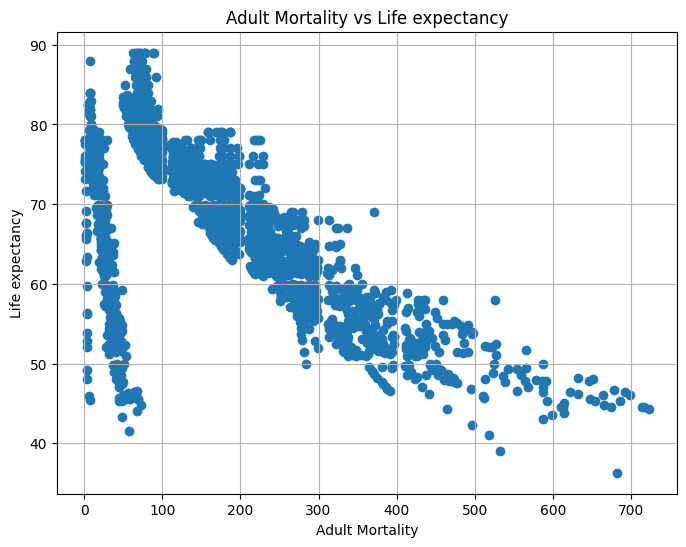

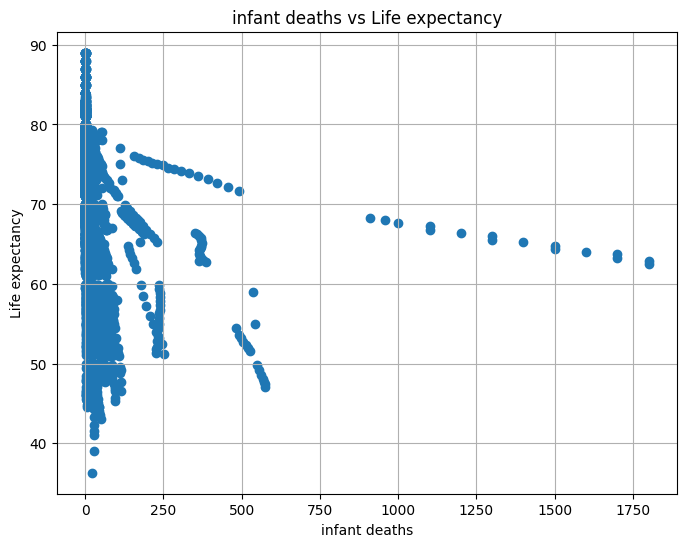

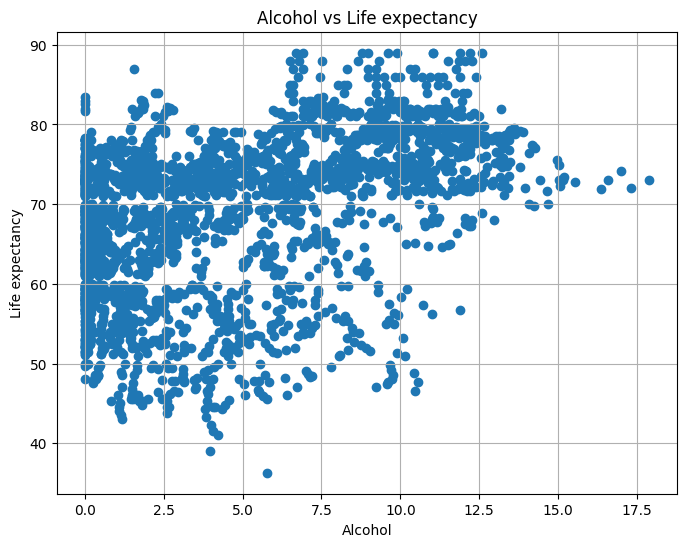

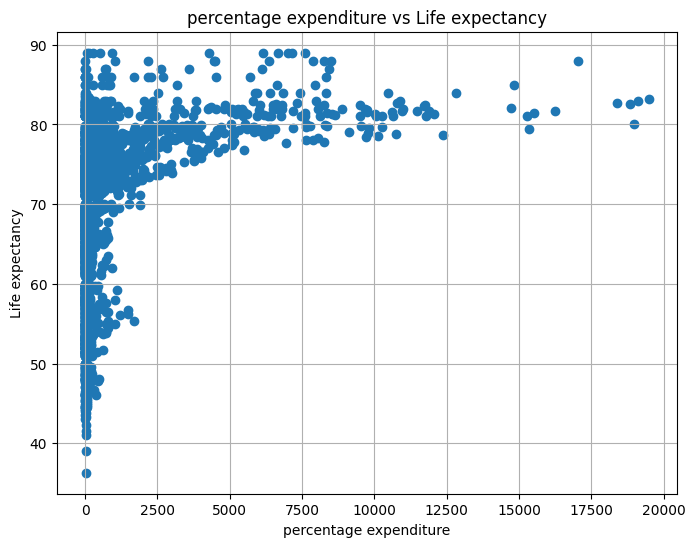

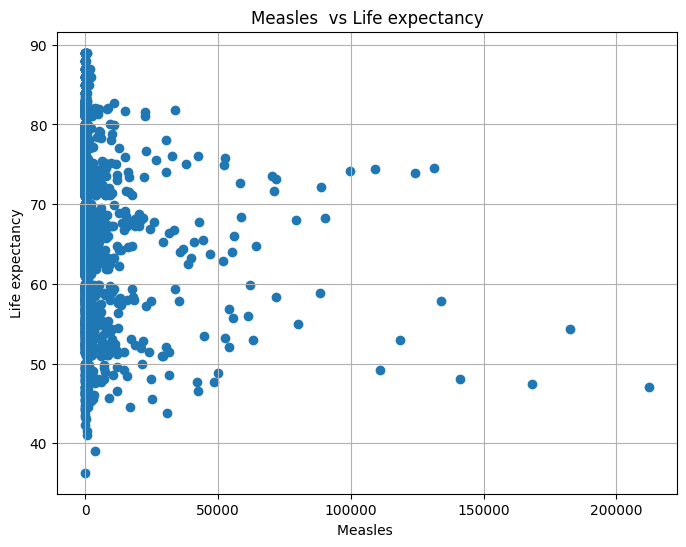

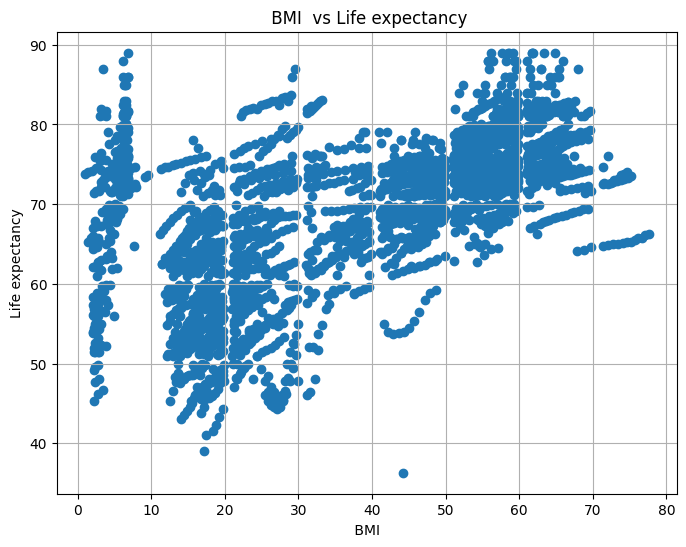

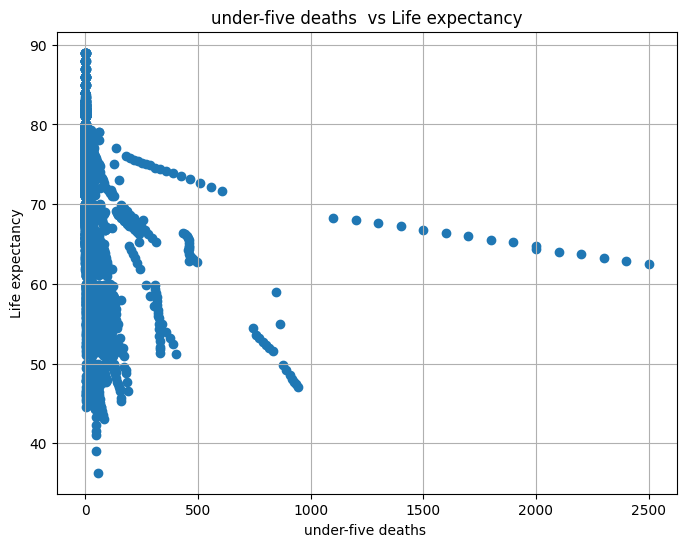

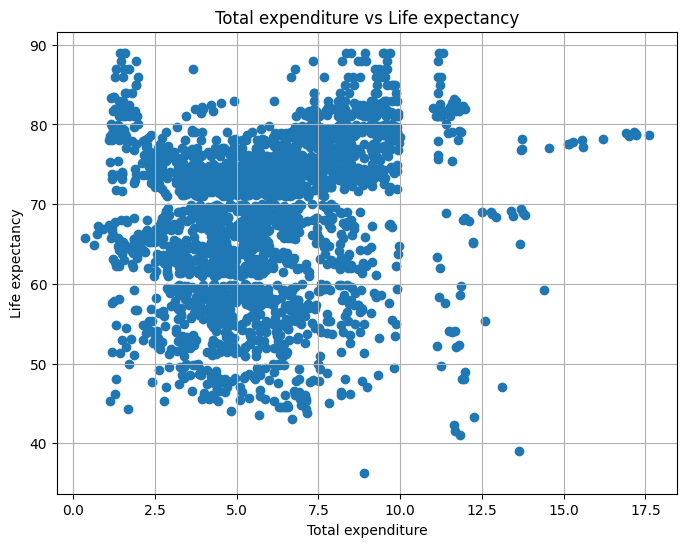

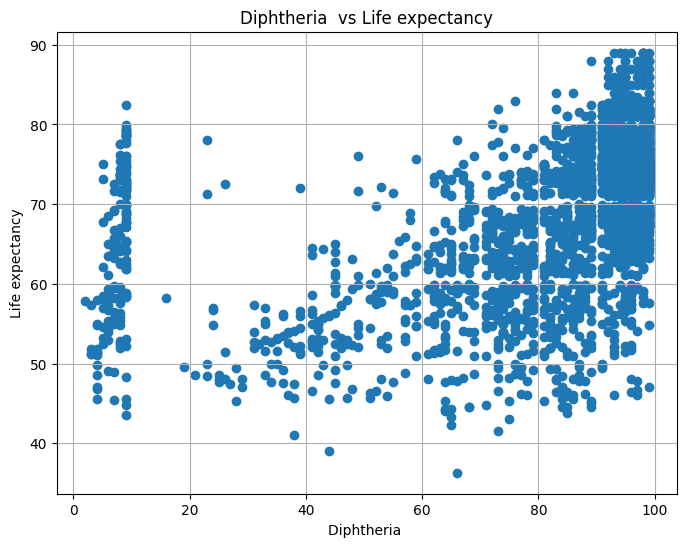

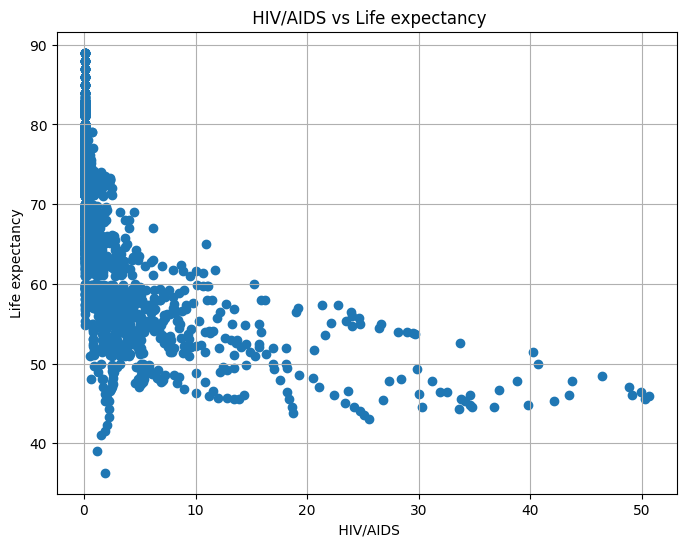

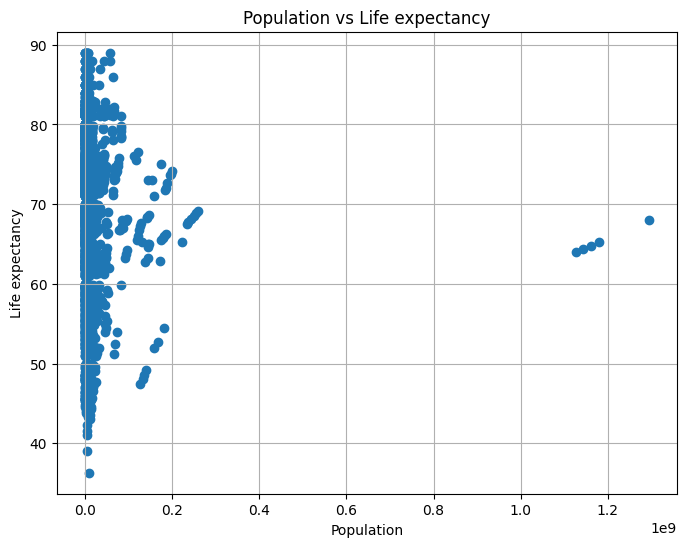

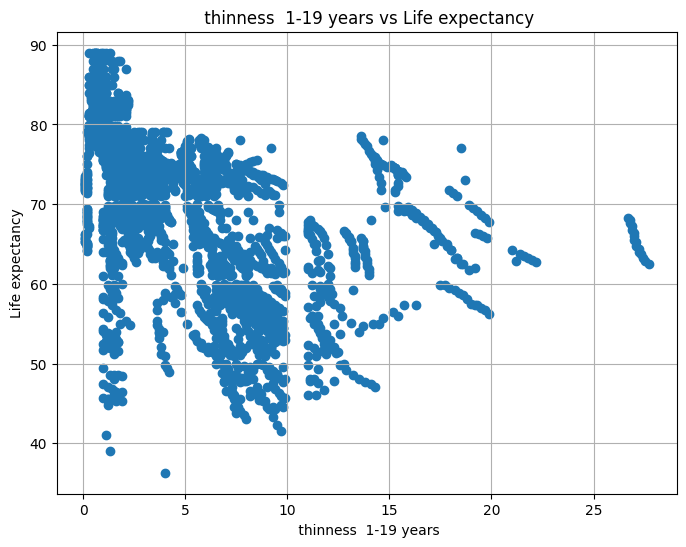

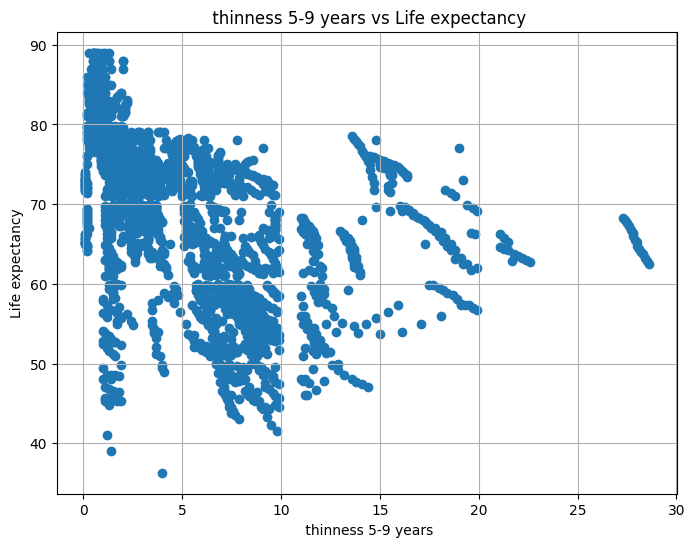

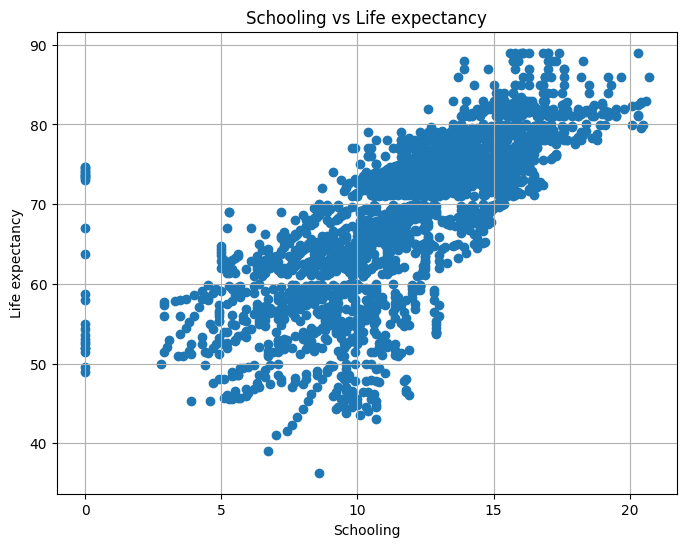

In [ ]:
# Lee el archivo CSV
df = pd.read_csv('sample_data/life_expectancy_data.csv')

columnas_a_eliminar = [
    'Country',
    'Year',
    'Status',
    'Hepatitis B',
    'Polio',
    'GDP',
    'Income composition of resources'
]

df = df.drop(columns=columnas_a_eliminar)

print(df.head())

# variable de respuesta
y = df.iloc[:, 0]  # Life expectancy

# lista variables predictoras
variables_predictoras = [
    'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Measles ', ' BMI ',
    'under-five deaths ', 'Total expenditure', 'Diphtheria ',
    ' HIV/AIDS', 'Population', ' thinness  1-19 years',
    ' thinness 5-9 years', 'Schooling'
]

# lista de los índices correspondientes de las columnas a usar
indices_predictoras = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# Crear gráficos para cada variable predictora vs la variable de respuesta
for i, variable in zip(indices_predictoras, variables_predictoras):
    plt.figure(figsize=(8, 6))
    plt.scatter(df.iloc[:, i], y)
    plt.title(f'{variable} vs Life expectancy')
    plt.xlabel(variable)
    plt.ylabel('Life expectancy')
    plt.grid(True)
    plt.show()

**Implementa la fórmula directa para calcular los coeficientes de un modelo de regresión lineal, y obtenga con ella el modelo que corresponde a la variable de respuesta y las variables predictoras asignadas a tu número de matrícula.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fit_model(X, y):
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y

def predict(X, beta):
    return X @ beta

# Verificar y limpiar los datos
df = df.dropna()  # Eliminar filas con valores nulos

# Generate data
x = df.drop(columns=['Life expectancy ']).values
X = np.column_stack((np.ones(x.shape[0]), x))


y = df['Life expectancy '].values

#print(x)
#print(y)
# Build linear model
beta = fit_model(X, y)
print ("Model coefficients: ", beta)

Model coefficients:  [ 5.17061521e+01 -1.61129286e-02  9.70040854e-02 -4.30116699e-02
  4.01958158e-04 -7.89580123e-06  4.79941297e-02 -7.10688800e-02
  4.52976650e-03  3.60694765e-02 -4.79090472e-01 -2.02696135e-09
 -5.99190949e-02 -1.08543284e-02  1.36248227e+00]


**Evalúa con validación cruzada de k-pliegues tu modelo, calculando los valores de R2, MSE y MAE.**

In [ ]:
# Evaluate residuals
y_pred = predict(X, beta)
r = y - y_pred

# Plot residuals
# plt.scatter(y, r)
# plt.axline((0, 0), slope = 0, color = 'red')
# plt.xlabel('y')
# plt.ylabel('Error')
# plt.title('Residuals')
# plt.show()

# MSE, MAE y R^2 with the training set
print('Calculated with training set: ')
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

# cross validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle = True)

mse_cv = []
mae_cv = []
r2_cv = []

for train_index, test_index in kf.split(x):

    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]

    beta_cv = fit_model(x_train, y_train)

    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]

    y_pred = predict(x_test, beta_cv)

    # Calculate MSE, MAE and R^2
    mse_i = mean_squared_error(y_test, y_pred)
    #print('mse = ', mse_i)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    #print('mae = ', mae_i)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    #print('r^2= ', r2_i)
    r2_cv.append(r2_i)

print('MSE, MAE, R^2: ')
print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv),'  R^2:', np.average(r2_cv))

Calculated with training set: 
MSE:  15.810538582696783
MAE:  3.030442867257398
R^2:  0.8380103095816619
MSE, MAE, R^2: 
MSE: 73.13600619978408   MAE: 6.7790742477480395   R^2: 0.24718738647500887


**Utiliza validación cruzada de Monte Carlo con 1000 iteraciones para encontrar histogramas de R2, MSE y MAE.**

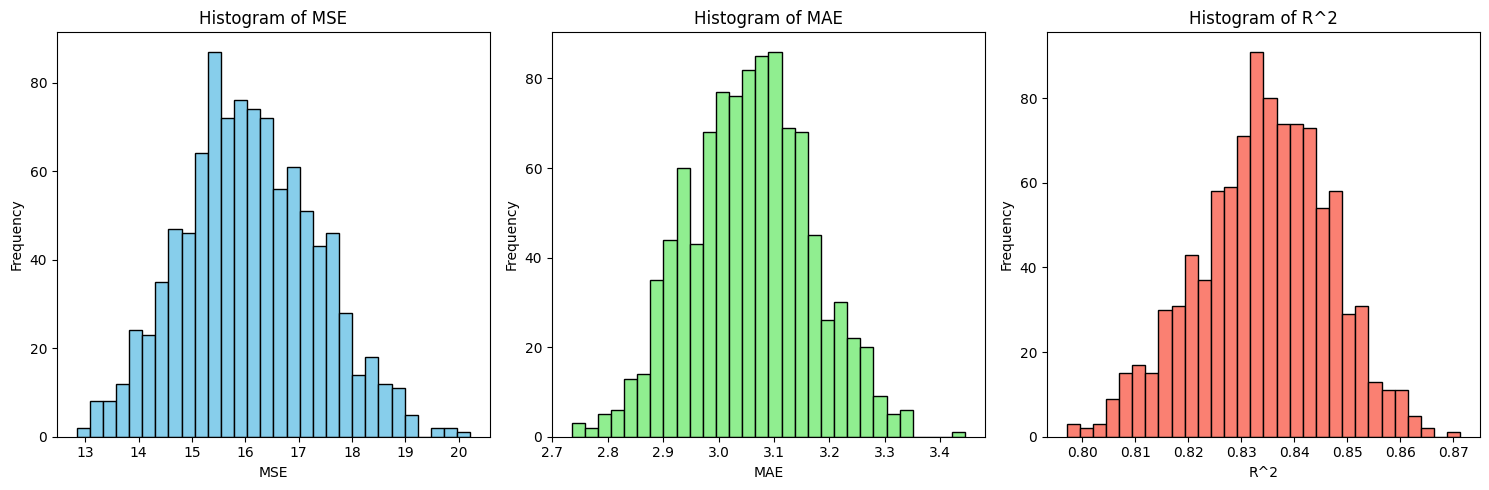

In [ ]:
# Listas para almacenar los resultados de cada iteración
mse_list = []
mae_list = []
r2_list = []

# Validación cruzada de Monte Carlo con 1000 iteraciones
for _ in range(1000):
    # Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Ajustar el modelo
    beta = fit_model(X_train, y_train)

    # Hacer predicciones
    y_pred = predict(X_test, beta)

    # Calcular MSE, MAE y R^2
    mse_list.append(mean_squared_error(y_test, y_pred))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

# Graficar los histogramas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(mse_list, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of MSE')
plt.xlabel('MSE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(mae_list, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of MAE')
plt.xlabel('MAE')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(r2_list, bins=30, color='salmon', edgecolor='black')
plt.title('Histogram of R^2')
plt.xlabel('R^2')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Utiliza el método de validación cruzada asignado a tu matrícula para mostrar los histogramas de MSE y MAE. ¿Los histogramas son distintos a los obtenidos con el método de Monte Carlo?**

LOOCV

MSE (LOOCV): 16.073669667625456
MAE (LOOCV): 3.053411458394682


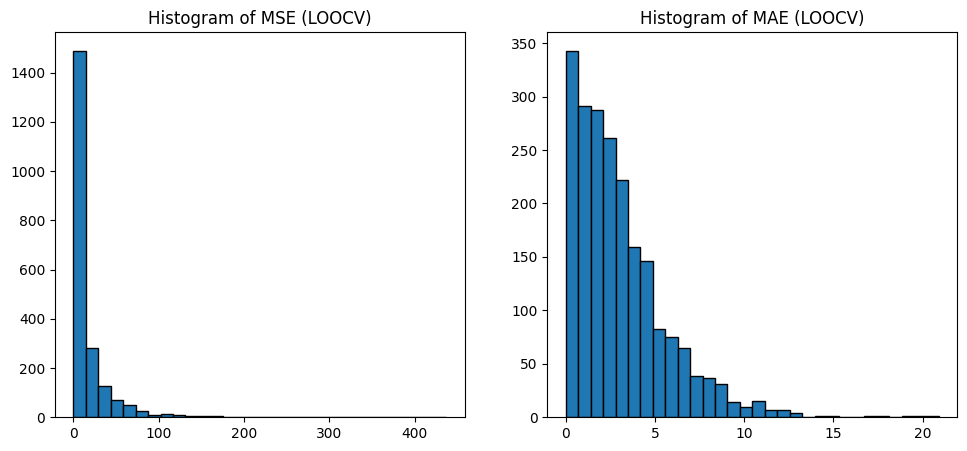

In [ ]:
#quitar warnings
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignorar las advertencias UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

#Reactivar warnings
#warnings.resetwarnings()

# Inicializar LOOCV
loo = LeaveOneOut()

# Listas para almacenar los resultados
mse_cv = []
mae_cv = []
r2_cv = []

# Realizar la validación cruzada LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Ajustar el modelo
    beta_cv = fit_model(X_train, y_train)

    # Realizar predicción
    y_pred = predict(X_test, beta_cv)

    # Calcular MSE, MAE y R²
    mse_cv.append(mean_squared_error(y_test, y_pred))
    mae_cv.append(mean_absolute_error(y_test, y_pred))

    #r2_cv.append(r2_score(y_test, y_pred))

    r2 = r2_score(y_test, y_pred)

    # Solo agregar R² si está bien definido
    if not np.isnan(r2):
        r2_cv.append(r2)

# Generar histogramas
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.hist(mse_cv, bins=30, edgecolor='black')
plt.title('Histogram of MSE (LOOCV)')
plt.subplot(1, 3, 2)
plt.hist(mae_cv, bins=30, edgecolor='black')
plt.title('Histogram of MAE (LOOCV)')

# Promedios finales
print('MSE (LOOCV):', np.mean(mse_cv))
print('MAE (LOOCV):', np.mean(mae_cv))


**Agrega al conjunto de datos columnas que representen los cuadrados de las variables predictoras (por ejemplo, X112, X132), así como los productos entre pares de variables (por ejemplo, X1xX2, X3xX4). Repita los pasos 1, 2 y 3 pero con este nuevo conjunto de datos**


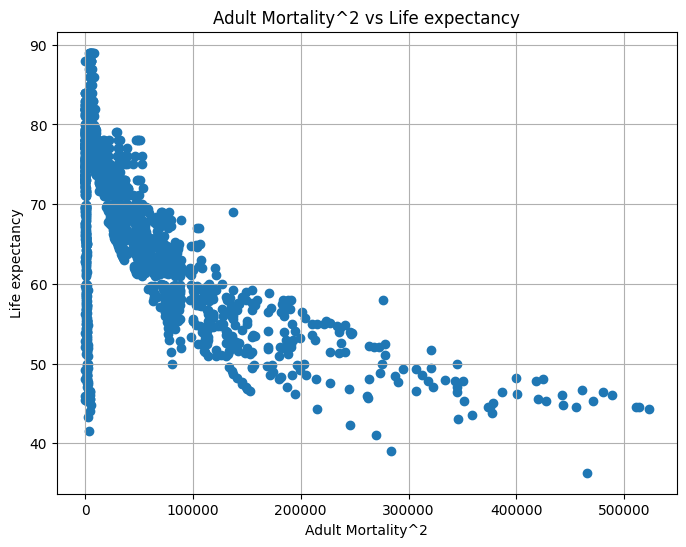

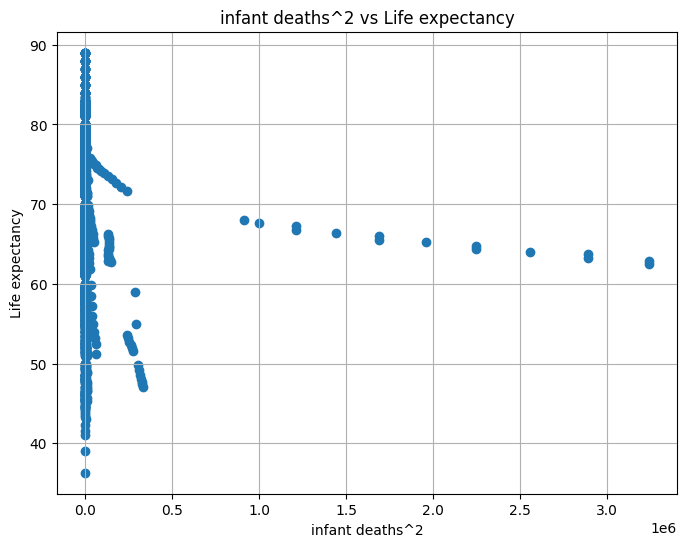

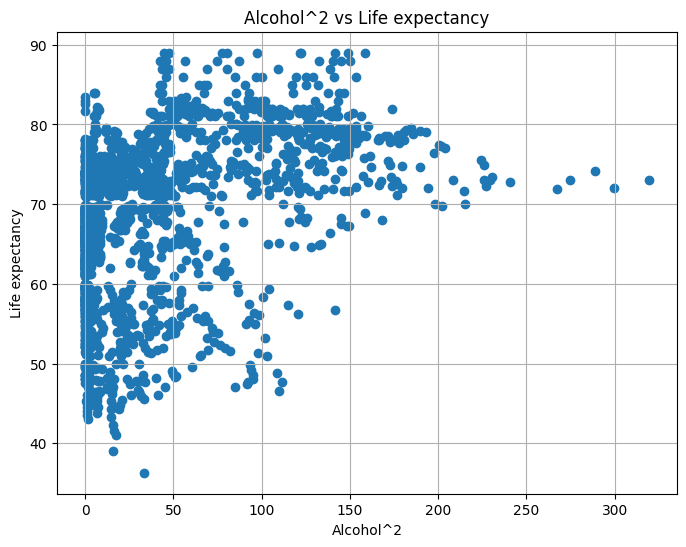

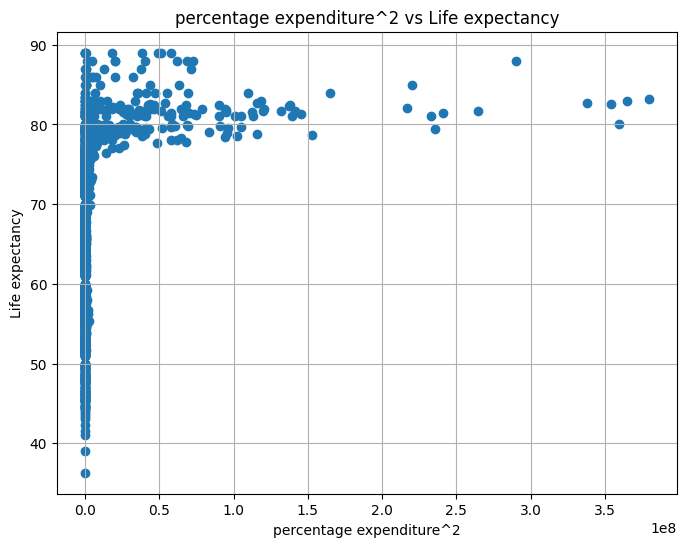

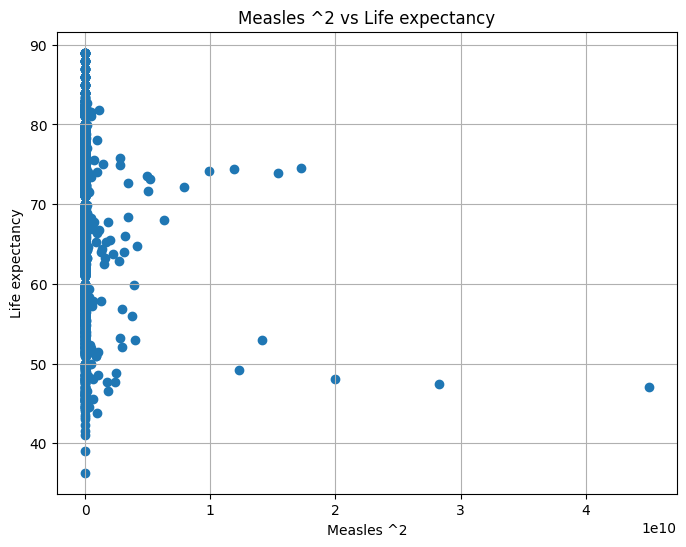

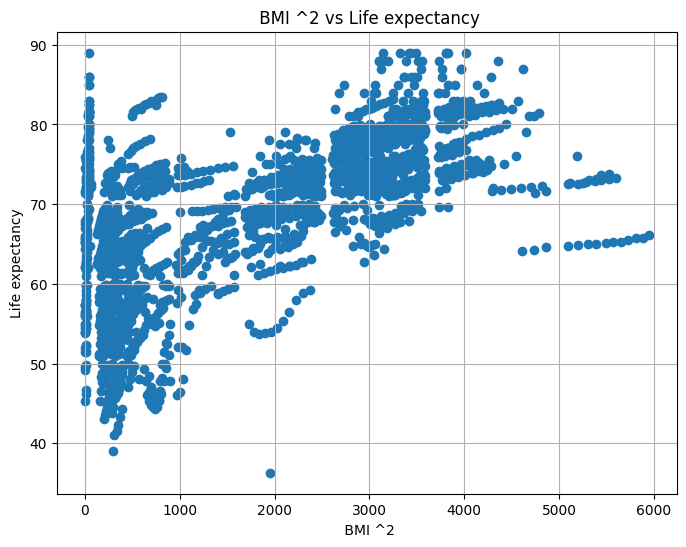

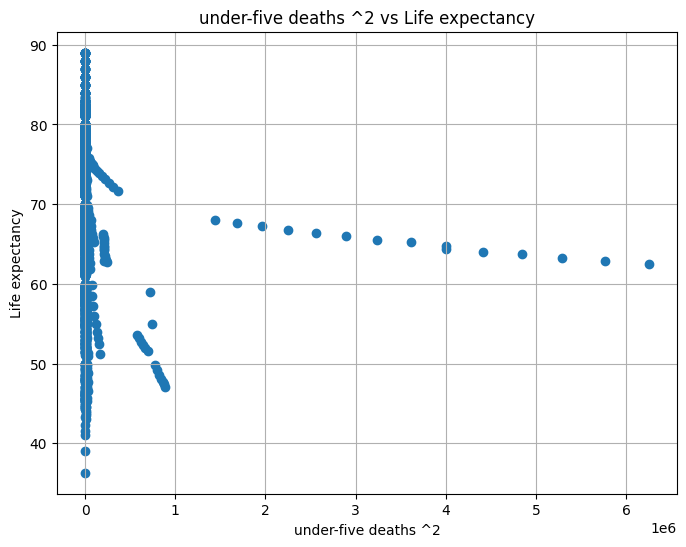

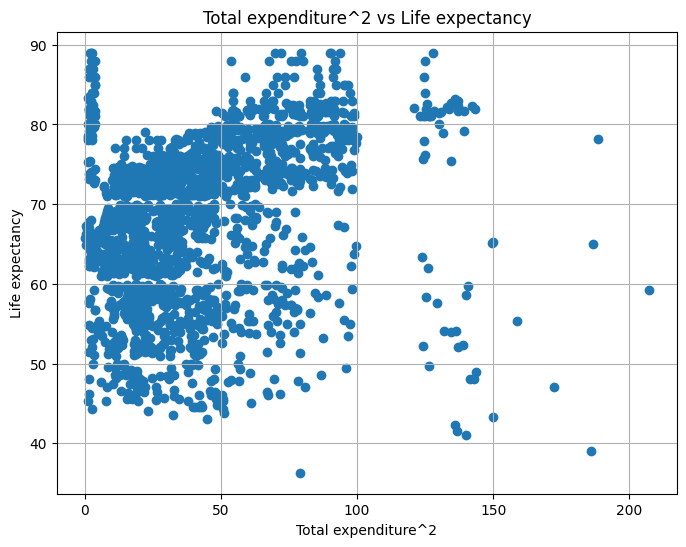

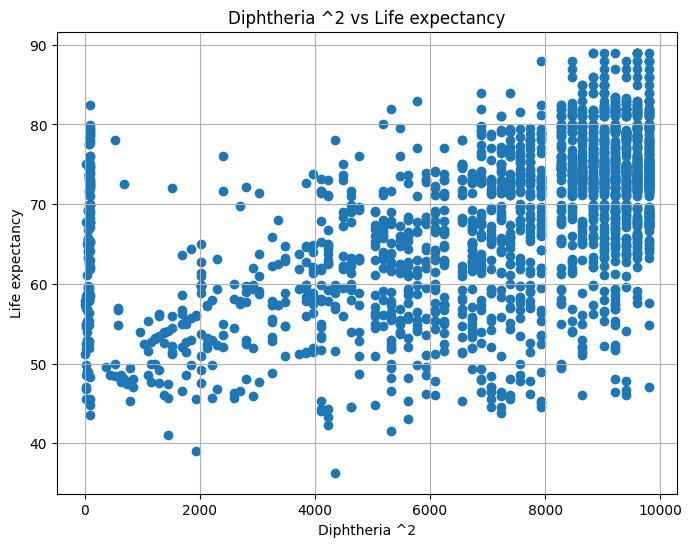

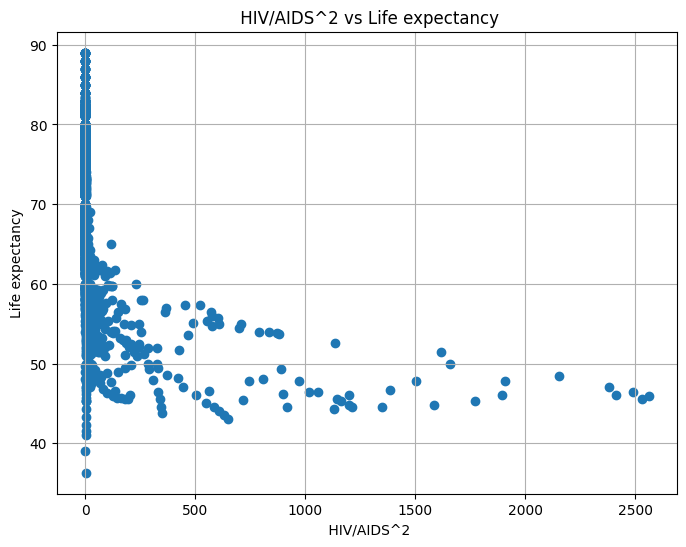

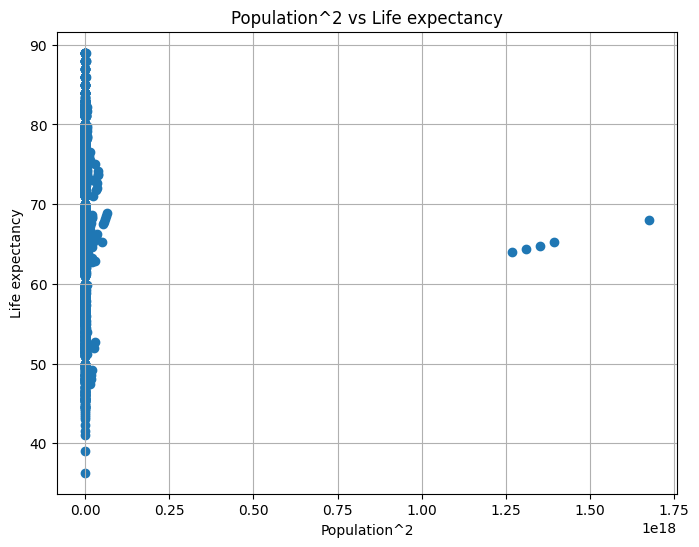

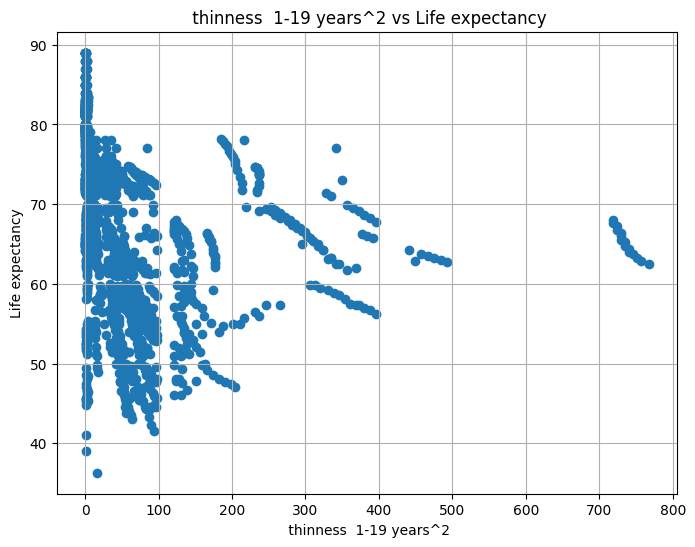

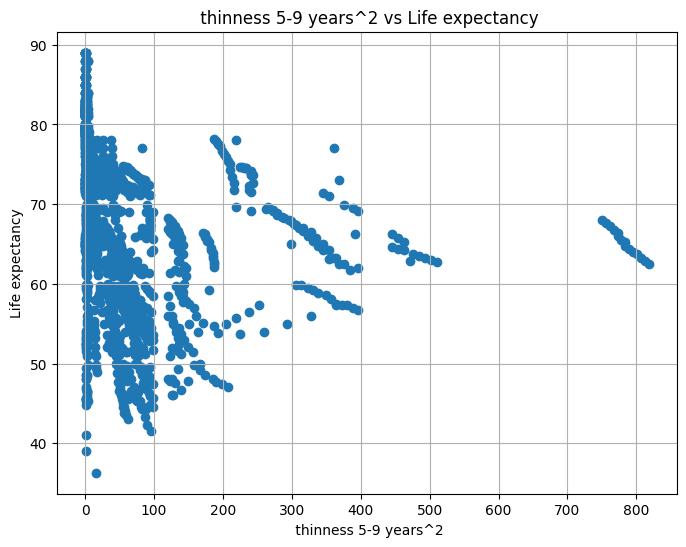

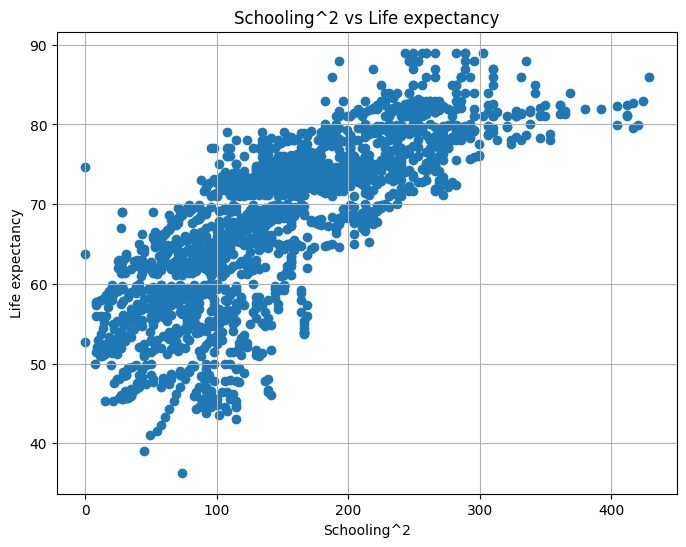

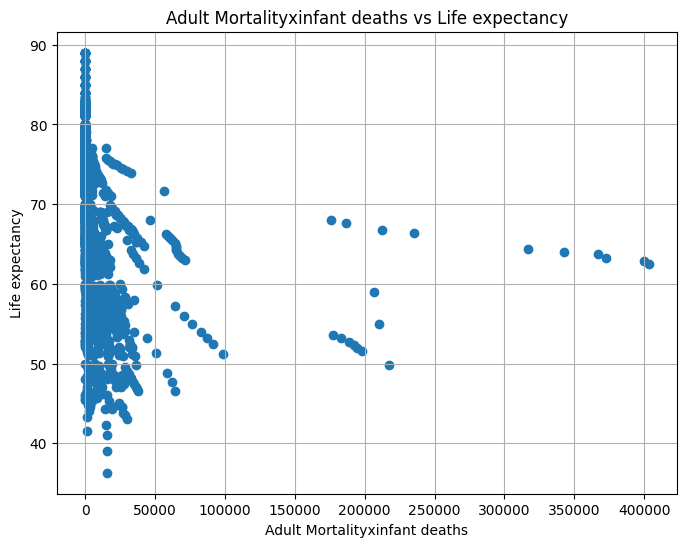

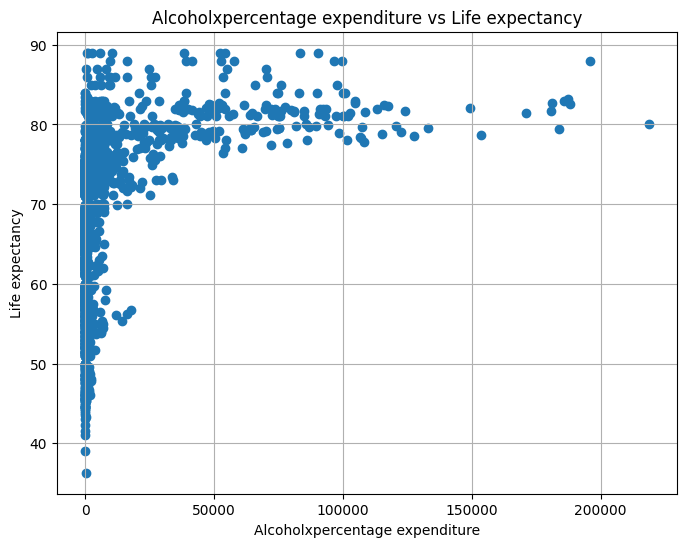

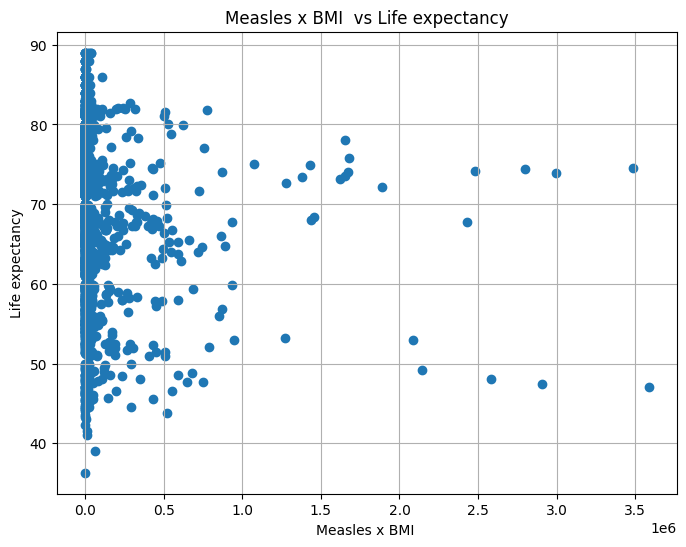

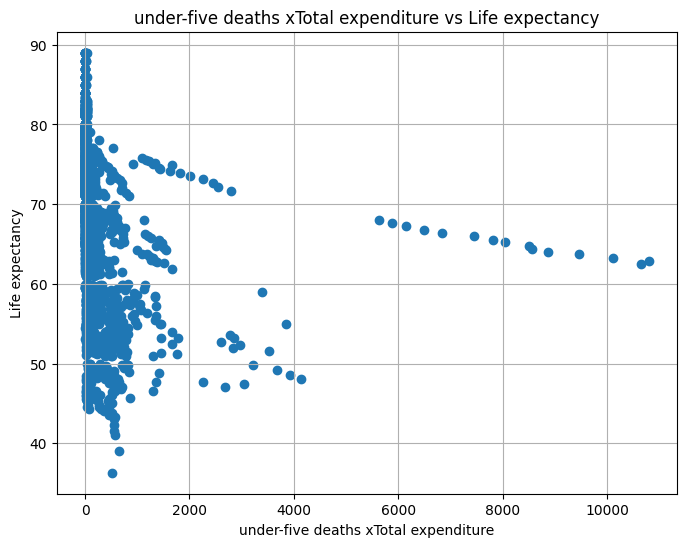

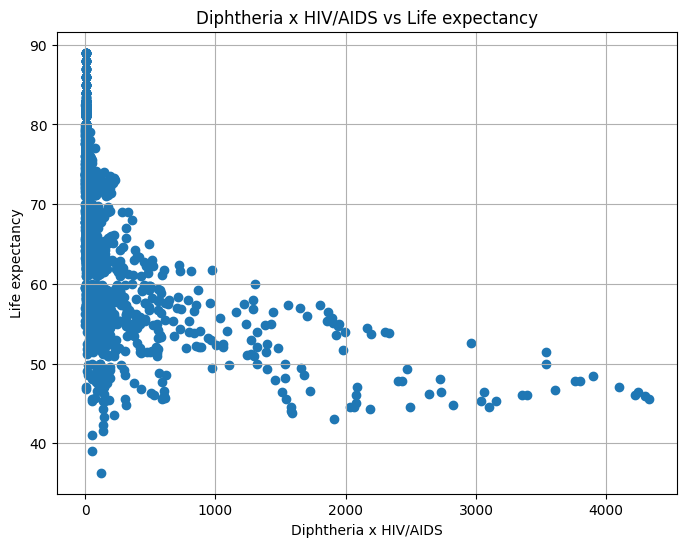

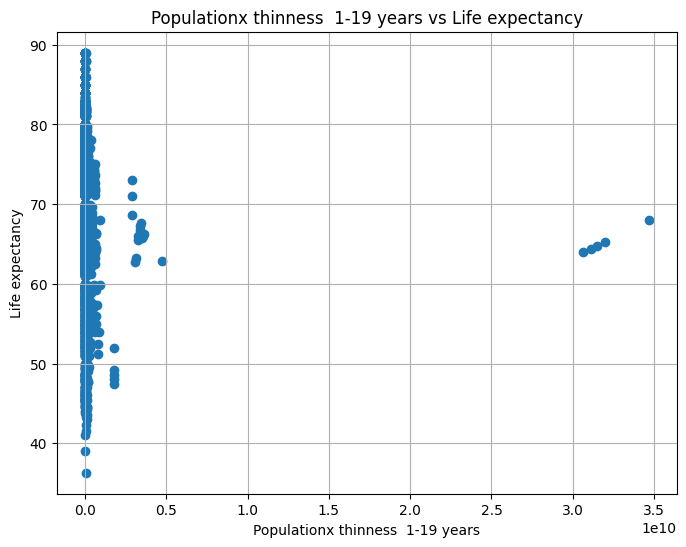

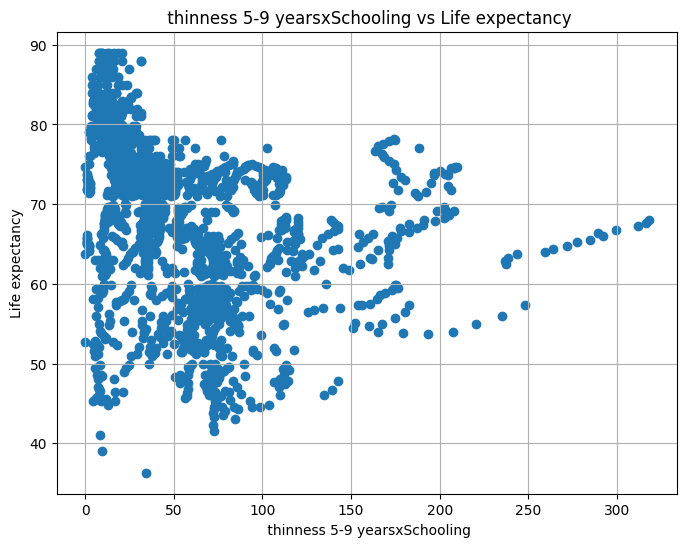

In [ ]:
x = df.drop(columns=['Life expectancy '])

# Número de columnas originales antes de añadir las nuevas
num_columnas_iniciales = x.shape[1]

# Crear columnas para los cuadrados de las variables predictoras
for var in variables_predictoras:
    x[f'{var}^2'] = x[var] ** 2

# Definir los pares de variables específicas para multiplicación
pares_multiplicacion = [
    ('Adult Mortality', 'infant deaths'),
    ('Alcohol', 'percentage expenditure'),
    ('Measles ', ' BMI '),
    ('under-five deaths ', 'Total expenditure'),
    ('Diphtheria ', ' HIV/AIDS'),
    ('Population', ' thinness  1-19 years'),
    (' thinness 5-9 years', 'Schooling')
]

# Crear columnas para los productos entre pares de variables específicas
for var1, var2 in pares_multiplicacion:
    x[f'{var1}x{var2}'] = x[var1] * x[var2]

# Número de columnas después de añadir las nuevas
num_columnas_totales = x.shape[1]

# Índice donde empiezan las nuevas columnas
indice_nuevas_columnas = num_columnas_iniciales

#PASO 1

# Crear una lista de los índices correspondientes de las columnas a usar
indices_predictoras = np.arange(14, 36, 1)

# Crear gráficos para cada variable predictora vs la variable de respuesta
for i in range(indice_nuevas_columnas, num_columnas_totales):
    columna_nueva = x.columns[i]
    plt.figure(figsize=(8, 6))
    plt.scatter(x.iloc[:, i], y)
    plt.title(f'{columna_nueva} vs Life expectancy')
    plt.xlabel(columna_nueva)
    plt.ylabel('Life expectancy')
    plt.grid(True)
    plt.show()

**Implementa regresión Ridge con descenso de gradiente, y genera el gráfico de Ridge para el conjunto de datos original (sin las variables elevadas al cuadrado).**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definir variables predictoras y la variable dependiente
variables_predictoras = [
    'Adult Mortality', 'infant deaths', 'Alcohol',
    'percentage expenditure', 'Measles ', ' BMI ',
    'under-five deaths ', 'Total expenditure', 'Diphtheria ',
    ' HIV/AIDS', 'Population', ' thinness  1-19 years',
    ' thinness 5-9 years', 'Schooling'
]

# Verificar y limpiar los datos
df = df.dropna()  # Eliminar filas con valores nulos

X = df[variables_predictoras].values
y = df['Life expectancy '].values

# Añadir una columna de unos para el término de sesgo
X = np.column_stack((np.ones(X.shape[0]), X))

# Parámetros para el descenso de gradiente
learning_rate = 0.01
num_iterations = 1000
lambda_reg = 1.0  # Parámetro de regularización

# Inicializar parámetros
m, n = X.shape
beta = np.zeros(n)

# Función de costo para Ridge
def compute_cost(X, y, beta, lambda_reg):
    m = len(y)
    predictions = X @ beta
    cost = (1 / (2 * m)) * (np.sum((predictions - y) ** 2) + lambda_reg * np.sum(beta[1:] ** 2))
    return cost

# Descenso de gradiente para Ridge
for i in range(num_iterations):
    predictions = X @ beta
    errors = predictions - y
    gradient = (1 / m) * (X.T @ errors + lambda_reg * np.concatenate(([0], beta[1:])))
    beta -= learning_rate * gradient

    if i % 100 == 0:  # Imprimir cada 100 iteraciones
        print(f"Iteration {i}, Cost: {compute_cost(X, y, beta, lambda_reg)}")

# Imprimir los coeficientes finales
print("Ridge Regression Coefficients:", beta)

# Graficar resultados
# plt.figure(figsize=(10, 6))
# plt.scatter(df['Alcohol'], y, color='blue', label='Original Data')
# plt.plot(df['Alcohol'], X @ beta, color='red', label='Ridge Regression Line')
# plt.xlabel('Alcohol')
# plt.ylabel('Life expectancy ')
# plt.title('Ridge Regression Result')
# plt.legend()
# plt.show()



Iteration 0, Cost: 1.5875633766266937e+29
Iteration 100, Cost: nan
Iteration 200, Cost: nan
Iteration 300, Cost: nan
Iteration 400, Cost: nan
Iteration 500, Cost: nan
Iteration 600, Cost: nan
Iteration 700, Cost: nan
Iteration 800, Cost: nan
Iteration 900, Cost: nan
Ridge Regression Coefficients: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


<ipython-input-63-4f487331554e>:43: RuntimeWarning: invalid value encountered in matmul
  gradient = (1 / m) * (X.T @ errors + lambda_reg * np.concatenate(([0], beta[1:])))
<ipython-input-63-4f487331554e>:44: RuntimeWarning: invalid value encountered in subtract
  beta -= learning_rate * gradient


**Utiliza una librería para generar el gráfico de Lasso para el conjunto de datos original (sin las variables elevadas al cuadrado). ¿Qué variables son más relevantes para el modelo?**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.879e+03, tolerance: 2.053e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.012e+03, tolerance: 2.053e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.110e+03, tolerance: 2.053e

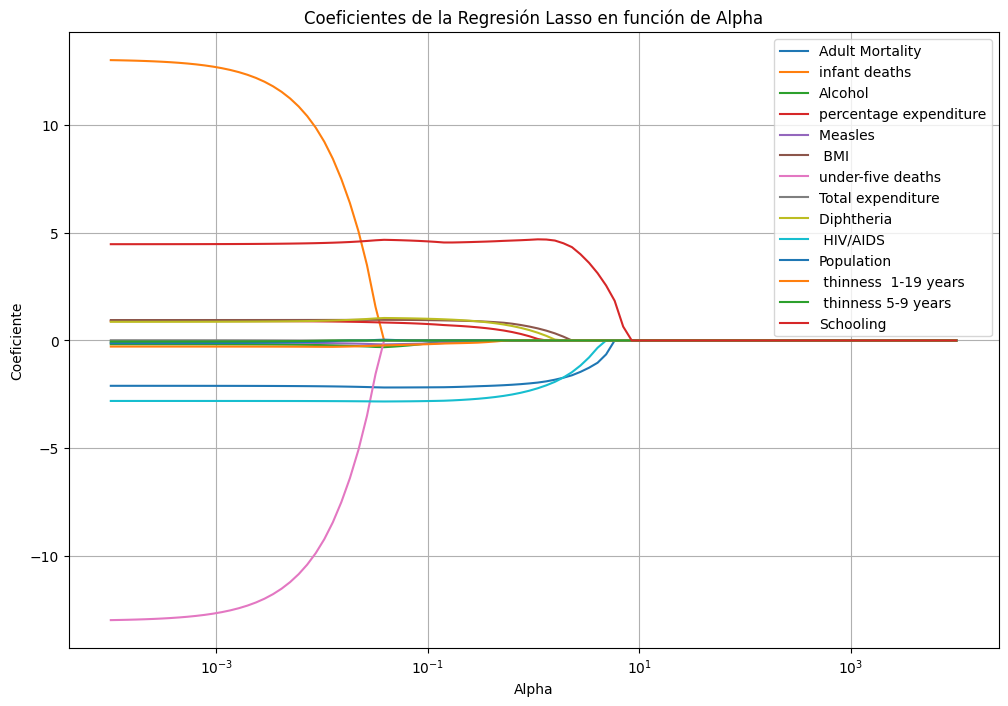

In [ ]:
X = df[variables_predictoras].values
y = df['Life expectancy '].values

# Estándarizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir un rango de valores para alpha
alphas = np.logspace(-4, 4, 100)  # 100 valores de alpha en una escala logarítmica

# Inicializar un array para almacenar los coeficientes
coef_matrix = np.zeros((len(alphas), len(variables_predictoras)))

# Ajustar el modelo Lasso para cada valor de alpha
for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_scaled, y)
    coef_matrix[i, :] = lasso.coef_

# Crear un gráfico para visualizar los coeficientes en función de alpha
plt.figure(figsize=(12, 8))
for i, var in enumerate(variables_predictoras):
    plt.plot(alphas, coef_matrix[:, i], label=var)

plt.xscale('log')  # Usar escala logarítmica para alpha
plt.xlabel('Alpha')
plt.ylabel('Coeficiente')
plt.title('Coeficientes de la Regresión Lasso en función de Alpha')
plt.legend()
plt.grid(True)
plt.show()

# **Viendo los resultados de regresión, desarrolla una conclusión sobre los siguientes puntos:**

**¿Consideras que el modelo de regresión lineal es efectivo para modelar los datos del problema? ¿Por qué?**

El modelo de regresión lineal no parece serparticularmente efectivo, el valor de r^2 es bajo y demuestra que el modelo no se acopla muy bien a los datos. Aunque los histogramas de Monte Carlo con 1000 iteraciones parecen dar un R^2 de 0.8, lo cual demostraria que si se acopla de forma aceptable a los datos.

**¿Observas una variabilidad importante en los valores de R2, MSE y MAE cuando aplicas validación cruzada? Detalla tu respuesta.**

Si se observa una variabilidad en los valores de R2, MSE y MAE usando validación cruzada, R2 mejoro mucho mediante el Monte Carlo de 1000 iteraciones, aunque los valores de MSE y MAE siguen sin ser del todo buenos.

**¿Qué modelo es mejor para los datos del problema, el lineal o el cuadrático? ¿Por qué?**

No noto una diferencia muy grande entre los modelos, por lo que creo que ambos son iguales de efectivos para este caso.

**¿Qué variables son más relevantes para el modelo según Ridge y Lasso?**

Las mas importantes de acuerdo a lasso son Schooling, Population y HIV/AIDS

**¿Encuentras alguna relación interesante entre la variable de respuesta y los predictores?**

Es interesante poder identificar cuales son las variables mas importantes, y cuales son menos importantes.


# Ejercicio 2

Evalúa con validación cruzada un modelo de regresión lineal para las variables asignadas según tu matrícula utilizando alguna librería o framework.

In [ ]:
df = pd.read_csv('sample_data/parkinsons_updrs.data', delimiter=',')
df.to_csv('sample_data/parkinsons_updrs.csv', index=False)

df.columns = ['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
              'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
              'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11',
              'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']

columnas_a_eliminar = [
    'subject#',
    'motor_UPDRS'
]

# Eliminar las columnas especificadas
df = df.drop(columns=columnas_a_eliminar)

print(df.head())

# variables predictoras (excluyendo X4, X9, X14 y X19)
X = df[['age', 'test_time', 'Jitter(%)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer',
        'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR', 'RPDE', 'DFA', 'PPE']]

# Seleccionar la variable objetivo
y = df['total_UPDRS']

# Crear el modelo de regresión lineal
model = LinearRegression()

# Definir el scoring a utilizar (MSE en este caso)
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Realizar la validación cruzada con 10 folds
cv_scores = cross_val_score(model, X, y, cv=10, scoring=scoring)

   age  sex  test_time  total_UPDRS  Jitter(%)  Jitter(Abs)  Jitter:RAP  \
0   72    0     5.6431       34.398    0.00662     0.000034     0.00401   
1   72    0    12.6660       34.894    0.00300     0.000017     0.00132   
2   72    0    19.6810       35.389    0.00481     0.000025     0.00205   
3   72    0    25.6470       35.810    0.00528     0.000027     0.00191   
4   72    0    33.6420       36.375    0.00335     0.000020     0.00093   

   Jitter:PPQ5  Jitter:DDP  Shimmer  Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
0      0.00317     0.01204  0.02565        0.230       0.01438       0.01309   
1      0.00150     0.00395  0.02024        0.179       0.00994       0.01072   
2      0.00208     0.00616  0.01675        0.181       0.00734       0.00844   
3      0.00264     0.00573  0.02309        0.327       0.01106       0.01265   
4      0.00130     0.00278  0.01703        0.176       0.00679       0.00929   

   Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE      DFA   

**Encuentra el número óptimo de predictores para el modelo utilizando el método filter y validación cruzada. Una vez que tengas el número óptimo, muestra las características seleccionadas.**

----- Selección óptima del número de características -----
---- Número de características = 1
MSE: 103.5068315223929   MAE: 8.473600952255389   R^2: 0.09583707467823706
---- Número de características = 2
MSE: 101.99530938393795   MAE: 8.36011106740909   R^2: 0.10914366695672544
---- Número de características = 3
MSE: 101.55667261322773   MAE: 8.346576591754273   R^2: 0.11291627405087534
---- Número de características = 4
MSE: 101.24366430673747   MAE: 8.327187033638278   R^2: 0.11570695845955918
---- Número de características = 5
MSE: 100.67106206306906   MAE: 8.290859186170696   R^2: 0.12075421736738301
---- Número de características = 6
MSE: 98.7841134313507   MAE: 8.20751645848084   R^2: 0.1371083047362574
---- Número de características = 7
MSE: 97.54603102912868   MAE: 8.149922530799014   R^2: 0.14793588111768566
---- Número de características = 8
MSE: 97.37654534747261   MAE: 8.148026156102082   R^2: 0.1494184327086098
---- Número de características = 9
MSE: 97.38774602236496   MA

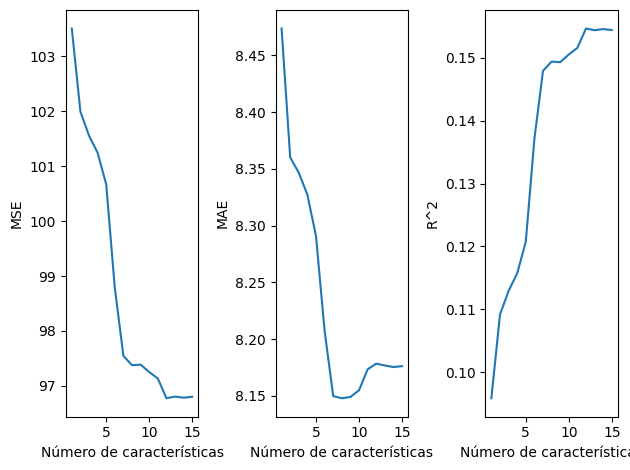

In [ ]:
# Obtener los nombres de las características
features = X.columns
n_features = len(features)

# Encontrar el número óptimo de características usando validación cruzada
print("----- Selección óptima del número de características -----")

n_feats = list(range(1, n_features + 1))

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- Número de características =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):

        # Fase de entrenamiento
        X_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]

        fselection_cv = SelectKBest(f_regression, k=n_feat)
        X_train = fselection_cv.fit_transform(X_train, y_train)

        regr_cv = LinearRegression()
        regr_cv.fit(X_train, y_train)

        # Fase de prueba
        X_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]
        X_test = fselection_cv.transform(X_test)
        y_pred = regr_cv.predict(X_test)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_nfeat.append(np.mean(mse_cv))
    mae_nfeat.append(np.mean(mae_cv))
    r2_nfeat.append(np.mean(r2_cv))

    print('MSE:', mse_nfeat[-1], '  MAE:', mae_nfeat[-1], '  R^2:', r2_nfeat[-1])

# Encontrar el número óptimo de características
opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)

# Entrenar el modelo con el número óptimo de características
regr = LinearRegression()
fselection = SelectKBest(f_regression, k=opt_features)
X_transformed = fselection.fit_transform(X, y)

regr.fit(X_transformed, y)
print("Coeficientes del modelo: ", regr.coef_)
print("Intercepto del modelo: ", regr.intercept_)

# Mostrar las características seleccionadas
selected_features = fselection.get_feature_names_out(features)
print("Características seleccionadas: ", selected_features)

# Graficar MSE, MAE y R^2 en función del número de características
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("Número de características")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("Número de características")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("Número de características")
axs[2].set_ylabel("R^2")

plt.show()

**Repite el paso anterior pero con selección de características secuencial (Wrapper). Reporta los predictores óptimos encontrados por el método.**

In [ ]:
# Obtener los nombres de las características
features = X.columns
n_features = len(features)

# Selección de características secuencial
print("----- Selección de características utilizando el 50% de predictores -----")

# Selección de características
regr = LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select=int(n_features * 0.5), direction='forward')
fselection.fit(X, y)

print("Características seleccionadas: ", list(X.columns[fselection.get_support()]))

# Ajustar el modelo utilizando el nuevo conjunto de datos y evaluar MSE, MAE y R^2
X_transformed = fselection.transform(X)
regr.fit(X_transformed, y)
print("Coeficientes del modelo: ", regr.coef_)
print("Intercepto del modelo: ", regr.intercept_)

y_pred = regr.predict(X_transformed)
print('MSE: ', mean_squared_error(y, y_pred))
print("MAE: ", mean_absolute_error(y, y_pred))
print("R^2: ", r2_score(y, y_pred))

# Evaluar el modelo usando validación cruzada
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):

    # Fase de entrenamiento
    X_train = X.iloc[train_index, :]
    y_train = y.iloc[train_index]

    regr_cv = LinearRegression()

    fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=int(n_features * 0.5), direction='forward')
    fselection_cv.fit(X_train, y_train)
    X_train = fselection_cv.transform(X_train)

    regr_cv.fit(X_train, y_train)

    # Fase de prueba
    X_test = X.iloc[test_index, :]
    y_test = y.iloc[test_index]
    X_test = fselection_cv.transform(X_test)
    y_pred = regr_cv.predict(X_test)

    mse_i = mean_squared_error(y_test, y_pred)
    mse_cv.append(mse_i)

    mae_i = mean_absolute_error(y_test, y_pred)
    mae_cv.append(mae_i)

    r2_i = r2_score(y_test, y_pred)
    r2_cv.append(r2_i)

print('MSE:', np.mean(mse_cv), '  MAE:', np.mean(mae_cv), '  R^2:', np.mean(r2_cv))

# Encontrar el número óptimo de características usando validación cruzada
print("----- Selección óptima del número de características -----")

n_feats = list(range(1, n_features + 1))

mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- Número de características =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):

        # Fase de entrenamiento
        X_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]

        regr_cv = LinearRegression()

        fselection_cv = SequentialFeatureSelector(regr_cv, n_features_to_select=n_feat, direction='forward')
        fselection_cv.fit(X_train, y_train)
        X_train = fselection_cv.transform(X_train)

        regr_cv.fit(X_train, y_train)

        # Fase de prueba
        X_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]
        X_test = fselection_cv.transform(X_test)
        y_pred = regr_cv.predict(X_test)

        mse_i = mean_squared_error(y_test, y_pred)
        mse_cv.append(mse_i)

        mae_i = mean_absolute_error(y_test, y_pred)
        mae_cv.append(mae_i)

        r2_i = r2_score(y_test, y_pred)
        r2_cv.append(r2_i)

    mse = np.mean(mse_cv)
    mse_nfeat.append(mse)

    mae = np.mean(mae_cv)
    mae_nfeat.append(mae)

    r2 = np.mean(r2_cv)
    r2_nfeat.append(r2)

    print('MSE:', mse, '  MAE:', mae, '  R^2:', r2)

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Número óptimo de características: ", opt_features)

# Graficar MSE, MAE y R^2 en función del número de características
fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("Número de características")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("Número de características")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("Número de características")
axs[2].set_ylabel("R^2")

plt.show()

# Ajustar el modelo con el número óptimo de características
regr = LinearRegression()
fselection = SequentialFeatureSelector(regr, n_features_to_select=opt_features, direction='forward')
fselection.fit(X, y)

print("Características seleccionadas: ", list(X.columns[fselection.get_support()]))

X_transformed = fselection.transform(X)
regr.fit(X_transformed, y)
print("Coeficientes del modelo: ", regr.coef_)
print("Intercepto del modelo: ", regr.intercept_)

----- Selección de características utilizando el 50% de predictores -----
Características seleccionadas:  ['age', 'test_time', 'Jitter(%)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'HNR']
Coeficientes del modelo:  [ 3.53012372e-01  1.47668070e-02  2.63811688e+02 -4.22213546e+04
 -3.47256706e+02  1.40037388e+04 -3.99246114e-01]
Intercepto del modelo:  13.566631316388962
MSE:  100.66407227436608
MAE:  8.362463099966469
R^2:  0.12065788093724916
MSE: 100.91858419226968   MAE: 8.374118560663735   R^2: 0.1185057703867772
----- Selección óptima del número de características -----
---- Número de características = 1
MSE: 103.5068315223929   MAE: 8.473600952255389   R^2: 0.09583707467823706
---- Número de características = 2
MSE: 101.57729716127231   MAE: 8.358247411005626   R^2: 0.11270892494774198
---- Número de características = 3
MSE: 101.49658204444992   MAE: 8.342607050594129   R^2: 0.11343689916578889
---- Número de características = 4
MSE: 101.38757110163756   MAE: 8.364402438132547  

ValueError: n_features_to_select must be < n_features.

**Haz el mismo proceso del paso 2, pero ahora con el método de selección de características recursivo. Reporta los predictores óptimos encontrados por el método.**

----- Feature selection using 50% of predictors -----
Selected features: ['Jitter(%)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:DDA']
Model coefficients: [   974.86253069 -55282.6202912    -739.11570714  18142.81685361
  -8141.07511347     77.14104064   2702.88254922]
Model intercept: 26.994014699898397
MSE: 113.01167799629401
MAE: 8.605589537102622
R^2: 0.012796460913648833
MSE: 112.97330858985929   MAE: 8.607937011936517   R^2: 0.012982586643122329
----- Optimal selection of number of features -----
---- n features = 1
MSE: 114.007690088039   MAE: 8.641208729509799   R^2: 0.0038494375621037193
---- n features = 2
MSE: 114.17937224435282   MAE: 8.65036876531004   R^2: 0.001889180913453603
---- n features = 3
MSE: 113.90881603430793   MAE: 8.638820608507366   R^2: 0.0047072907277029286
---- n features = 4
MSE: 114.06414188405464   MAE: 8.649521315141925   R^2: 0.002400463822443899
---- n features = 5
MSE: 113.62602700691066   MAE: 8.6410879865

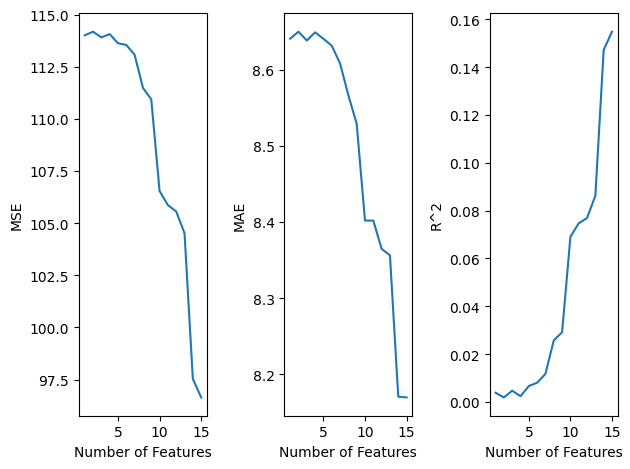

Selected features: ['age', 'test_time', 'Jitter(%)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR', 'RPDE', 'DFA', 'PPE']
Model coefficients: [ 3.12214911e-01  1.59440676e-02 -3.30233057e+02 -4.32312245e+04
 -5.97369291e+01  1.45969339e+04 -2.21684974e+01 -1.98813363e+04
 -1.20914195e+02  1.07181344e+02  6.60375831e+03 -5.06247010e-01
  4.41904992e+00 -2.90190534e+01  1.43572048e+01]
Model intercept: 33.693785405979064


In [ ]:
# Reducir el número de características a la mitad

print("----- Feature selection using 50% of predictors -----")

# Inicializar el modelo y RFE
regr = LinearRegression()
n_features_to_select = X.shape[1] // 2  # Seleccionar la mitad de las características
fselection = RFE(regr, n_features_to_select=n_features_to_select)
fselection.fit(X, y)

# Mostrar características seleccionadas
print("Selected features:", X.columns[fselection.support_].tolist())

# Evaluar el modelo usando el nuevo conjunto de datos
X_transformed = fselection.transform(X)
regr.fit(X_transformed, y)
print("Model coefficients:", regr.coef_)
print("Model intercept:", regr.intercept_)

y_pred = regr.predict(X_transformed)
print('MSE:', mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("R^2:", r2_score(y, y_pred))

# Evaluar el modelo usando validación cruzada
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    regr_cv = LinearRegression()
    fselection_cv = RFE(regr_cv, n_features_to_select=n_features_to_select)
    fselection_cv.fit(X_train, y_train)
    X_train_transformed = fselection_cv.transform(X_train)

    regr_cv.fit(X_train_transformed, y_train)

    X_test_transformed = fselection_cv.transform(X_test)
    y_pred = regr_cv.predict(X_test_transformed)

    mse_cv.append(mean_squared_error(y_test, y_pred))
    mae_cv.append(mean_absolute_error(y_test, y_pred))
    r2_cv.append(r2_score(y_test, y_pred))

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv), '  R^2:', np.average(r2_cv))

# Encontrar el número óptimo de características usando validación cruzada
print("----- Optimal selection of number of features -----")

n_feats = range(1, X.shape[1] + 1)
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        regr_cv = LinearRegression()
        fselection_cv = RFE(regr_cv, n_features_to_select=n_feat)
        fselection_cv.fit(X_train, y_train)
        X_train_transformed = fselection_cv.transform(X_train)

        regr_cv.fit(X_train_transformed, y_train)

        X_test_transformed = fselection_cv.transform(X_test)
        y_pred = regr_cv.predict(X_test_transformed)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_nfeat.append(np.average(mse_cv))
    mae_nfeat.append(np.average(mae_cv))
    r2_nfeat.append(np.average(r2_cv))

    print('MSE:', mse_nfeat[-1], '  MAE:', mae_nfeat[-1], '  R^2:', r2_nfeat[-1])

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features:", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("Number of Features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("Number of Features")
axs[2].set_ylabel("R^2")

plt.show()

# Ajustar el modelo con el número óptimo de características
regr = LinearRegression()
fselection = RFE(regr, n_features_to_select=opt_features)
fselection.fit(X, y)

print("Selected features:", X.columns[fselection.support_].tolist())

X_transformed = fselection.transform(X)
regr.fit(X_transformed, y)
print("Model coefficients:", regr.coef_)
print("Model intercept:", regr.intercept_)

**Repita los pasos anteriores, pero utilizando un modelo de regresión no lineal como K-vecinos más cercanos.**

----- Feature selection using 50% of predictors -----
Selected features: ['age', 'Shimmer', 'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE']
Model parameters: (KNN doesn't have coefficients or intercept)
MSE: 15.98175419523983
MAE: 2.7599999285106382
R^2: 0.8603927967261376
MSE: 26.135898796260427   MAE: 3.5904951931914892   R^2: 0.7714858477486637
----- Optimal selection of number of features -----
---- n features = 1
MSE: 65.06405635371104   MAE: 5.74814854468085   R^2: 0.4311382055486998
---- n features = 2
MSE: 33.91874891426914   MAE: 4.196323622127659   R^2: 0.7028460094915709
---- n features = 3
MSE: 32.15976383333229   MAE: 4.034963908085106   R^2: 0.7186422060885842
---- n features = 4
MSE: 30.574835916856237   MAE: 3.908420486808511   R^2: 0.732987780949386
---- n features = 5
MSE: 29.984534076165108   MAE: 3.8589109821276595   R^2: 0.7375379816694745
---- n features = 6
MSE: 26.412376521976785   MAE: 3.5856703387234043   R^2: 0.7690372789593273
---- n features = 7
MSE: 25.82052

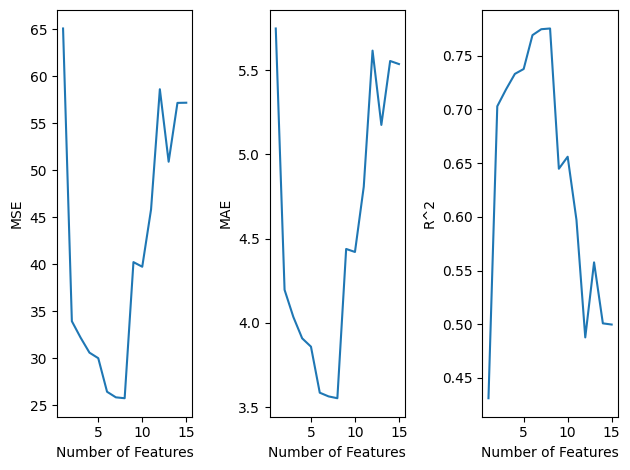

Selected features: ['age', 'Shimmer', 'Shimmer:APQ5', 'Shimmer:APQ11', 'HNR', 'RPDE', 'DFA', 'PPE']
Model parameters: (KNN doesn't have coefficients or intercept)
MSE: 15.929432092166941
MAE: 2.755672735319149
R^2: 0.8608498518397489


In [ ]:
# Reducir el número de características a la mitad
print("----- Feature selection using 50% of predictors -----")

# Inicializar el modelo KNN
knn = KNeighborsRegressor()

# Selección de características usando SelectKBest
n_features_to_select = X.shape[1] // 2  # Seleccionar la mitad de las características
selector = SelectKBest(score_func=f_regression, k=n_features_to_select)
selector.fit(X, y)

# Mostrar características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

# Evaluar el modelo usando el nuevo conjunto de datos
X_transformed = selector.transform(X)
knn.fit(X_transformed, y)
print("Model parameters: (KNN doesn't have coefficients or intercept)")

y_pred = knn.predict(X_transformed)
print('MSE:', mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("R^2:", r2_score(y, y_pred))

# Evaluar el modelo usando validación cruzada
mse_cv = []
mae_cv = []
r2_cv = []

kf = KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_cv = KNeighborsRegressor()

    # Aplicar selección de características en el conjunto de entrenamiento
    X_train_transformed = selector.transform(X_train)

    knn_cv.fit(X_train_transformed, y_train)

    # Test phase
    X_test_transformed = selector.transform(X_test)
    y_pred = knn_cv.predict(X_test_transformed)

    mse_cv.append(mean_squared_error(y_test, y_pred))
    mae_cv.append(mean_absolute_error(y_test, y_pred))
    r2_cv.append(r2_score(y_test, y_pred))

print('MSE:', np.average(mse_cv), '  MAE:', np.average(mae_cv), '  R^2:', np.average(r2_cv))

# Encontrar el número óptimo de características usando validación cruzada
print("----- Optimal selection of number of features -----")

n_feats = range(1, X.shape[1] + 1)
mse_nfeat = []
mae_nfeat = []
r2_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)

    selector = SelectKBest(score_func=f_regression, k=n_feat)

    mse_cv = []
    mae_cv = []
    r2_cv = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn_cv = KNeighborsRegressor()

        selector.fit(X_train, y_train)
        X_train_transformed = selector.transform(X_train)

        knn_cv.fit(X_train_transformed, y_train)

        X_test_transformed = selector.transform(X_test)
        y_pred = knn_cv.predict(X_test_transformed)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    mse_nfeat.append(np.average(mse_cv))
    mae_nfeat.append(np.average(mae_cv))
    r2_nfeat.append(np.average(r2_cv))

    print('MSE:', mse_nfeat[-1], '  MAE:', mae_nfeat[-1], '  R^2:', r2_nfeat[-1])

opt_index = np.argmin(mse_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features:", opt_features)

fig, axs = plt.subplots(1, 3, tight_layout=True)
axs[0].plot(n_feats, mse_nfeat)
axs[0].set_xlabel("Number of Features")
axs[0].set_ylabel("MSE")

axs[1].plot(n_feats, mae_nfeat)
axs[1].set_xlabel("Number of Features")
axs[1].set_ylabel("MAE")

axs[2].plot(n_feats, r2_nfeat)
axs[2].set_xlabel("Number of Features")
axs[2].set_ylabel("R^2")

plt.show()

# Ajustar el modelo con el número óptimo de características
selector = SelectKBest(score_func=f_regression, k=opt_features)
selector.fit(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

X_transformed = selector.transform(X)
knn.fit(X_transformed, y)
print("Model parameters: (KNN doesn't have coefficients or intercept)")

# Evaluar el modelo ajustado
y_pred = knn.predict(X_transformed)
print('MSE:', mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("R^2:", r2_score(y, y_pred))

**Busca al menos otros 4 modelos de regresión no lineal, y lleva a cabo los pasos del 1 al 5.**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crear los modelos no lineales
models = {
    "Regresión Polinómica": Pipeline([
        ('poly', PolynomialFeatures(degree=2)),  # Ajusta el grado según sea necesario
        ('linear', LinearRegression())
    ]),
    "Regresión con Bosques Aleatorios": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Regresión con Soporte Vectorial": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Árbol de Decisión": DecisionTreeRegressor(max_depth=5)  # Ajusta la profundidad según sea necesario
}

    #-- PASO 1: Evaluar con validación cruzada --

# Definir el scoring a utilizar (MSE en este caso)
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Crear un diccionario para almacenar los resultados
results = {}

for name, model in models.items():
    print(f"Evaluando {name}...")

    mse_cv = []
    mae_cv = []
    r2_cv = []

    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        # Fase de entrenamiento
        X_train = X.iloc[train_index, :]
        y_train = y.iloc[train_index]

        fselection_cv = SelectKBest(f_regression, k=opt_features)
        X_train = fselection_cv.fit_transform(X_train, y_train)

        model.fit(X_train, y_train)

        # Fase de prueba
        X_test = X.iloc[test_index, :]
        y_test = y.iloc[test_index]
        X_test = fselection_cv.transform(X_test)
        y_pred = model.predict(X_test)

        mse_cv.append(mean_squared_error(y_test, y_pred))
        mae_cv.append(mean_absolute_error(y_test, y_pred))
        r2_cv.append(r2_score(y_test, y_pred))

    results[name] = {
        "MSE": np.mean(mse_cv),
        "MAE": np.mean(mae_cv),
        "R^2": np.mean(r2_cv)
    }

# Mostrar los resultados
for name, metrics in results.items():
    print(f"Resultados para {name}:")
    print(f"MSE: {metrics['MSE']}, MAE: {metrics['MAE']}, R^2: {metrics['R^2']}\n")


Evaluando Regresión Polinómica...
Evaluando Regresión con Bosques Aleatorios...
Evaluando Regresión con Soporte Vectorial...
Evaluando Árbol de Decisión...
Resultados para Regresión Polinómica:
MSE: 90.71794445366919, MAE: 7.795880991361915, R^2: 0.20748020823847538

Resultados para Regresión con Bosques Aleatorios:
MSE: 39.61149890649574, MAE: 4.843128857070939, R^2: 0.6540834478209936

Resultados para Regresión con Soporte Vectorial:
MSE: 104.02624862763545, MAE: 8.22947007049483, R^2: 0.0913352778523426

Resultados para Árbol de Decisión:
MSE: 49.173071042298645, MAE: 5.249481137742836, R^2: 0.5699531670010061




Evaluando el modelo: Regresión Polinómica
----- Selección óptima del número de características -----
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 13
Características seleccionadas: ['age' 'test_time' 'Jitter(%)' 'Jitter:DDP' 'Shimmer' 'Shimmer:APQ3'
 'Shimmer:APQ5' 'Shimmer:APQ11' 'Shimmer:DDA' 'HNR' 'RPDE' 'DFA' 'PPE']


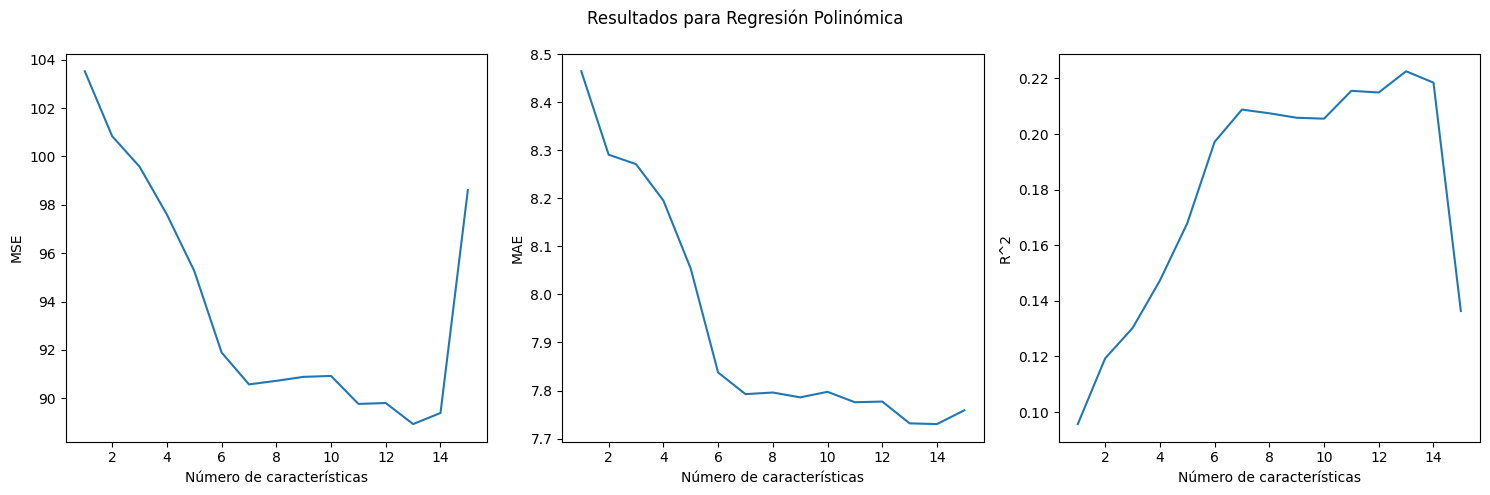


Evaluando el modelo: Regresión con Bosques Aleatorios
----- Selección óptima del número de características -----
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 15
Características seleccionadas: ['age' 'test_time' 'Jitter(%)' 'Jitter:RAP' 'Jitter:PPQ5' 'Jitter:DDP'
 'Shimmer' 'Shimmer:APQ3' 'Shimmer:APQ5' 'Shimmer:APQ11' 'Shimmer:DDA'
 'HNR' 'RPDE' 'DFA' 'PPE']


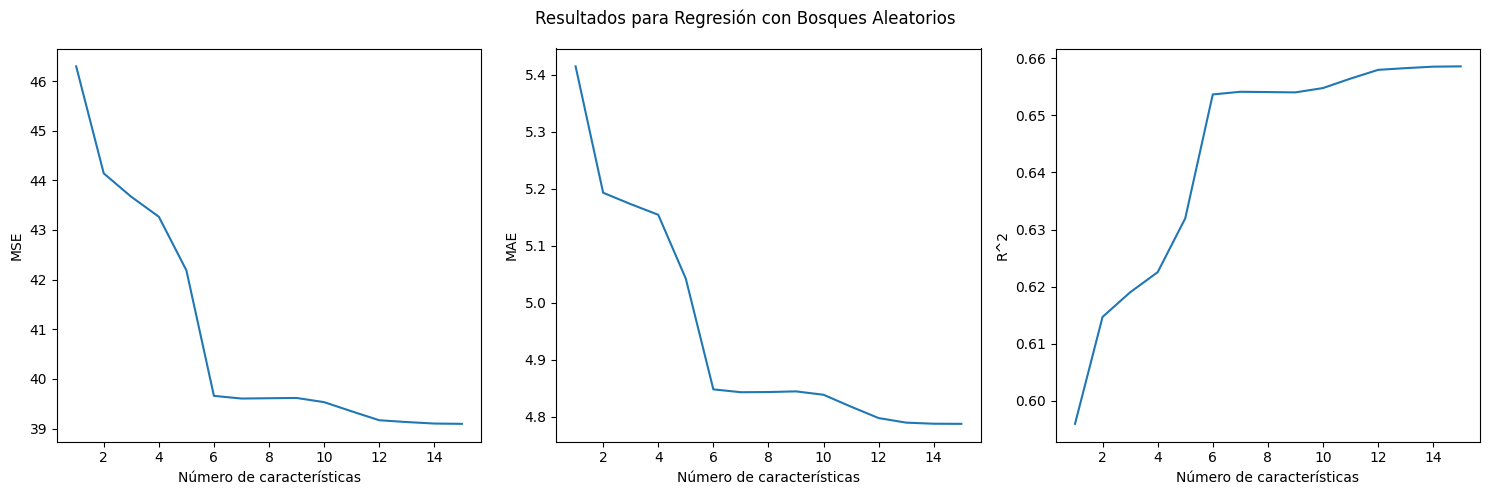


Evaluando el modelo: Regresión con Soporte Vectorial
----- Selección óptima del número de características -----
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 1
Características seleccionadas: ['age']


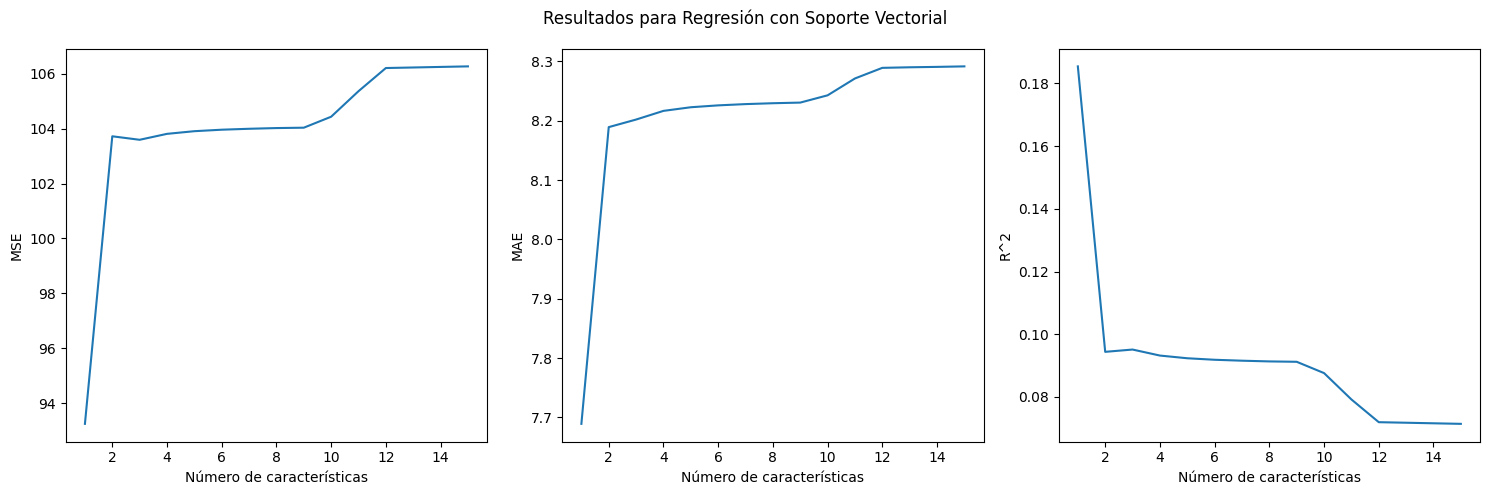


Evaluando el modelo: Árbol de Decisión
----- Selección óptima del número de características -----
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 9
Características seleccionadas: ['age' 'Shimmer' 'Shimmer:APQ5' 'Shimmer:APQ11' 'Shimmer:DDA' 'HNR' 'RPDE'
 'DFA' 'PPE']


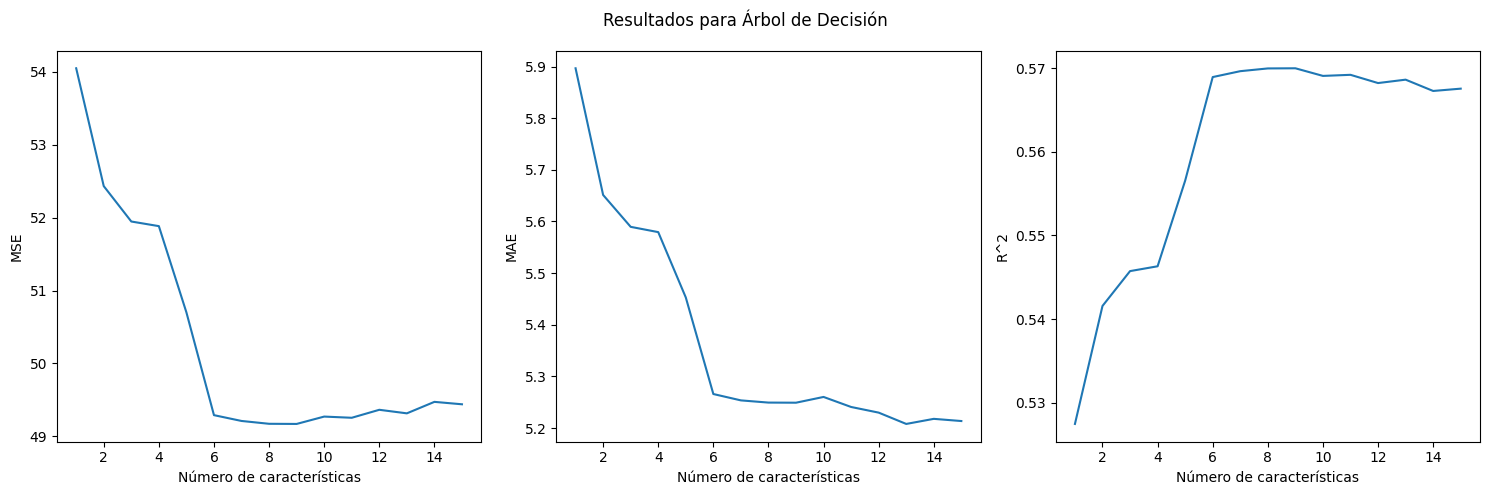

In [ ]:
# -- Paso 2: Encuentra el número óptimo de predictores para el modelo
#    utilizando el método filter y validación cruzada. --

# Obtener los nombres de las características
features = X.columns
n_features = len(features)

# Iterar sobre cada modelo
for model_name, model in models.items():
    print(f"\nEvaluando el modelo: {model_name}")
    print("----- Selección óptima del número de características -----")

    n_feats = list(range(1, n_features + 1))

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []

    for n_feat in n_feats:
        print(f'---- Número de características = {n_feat}')

        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        for train_index, test_index in kf.split(X):
            # Fase de entrenamiento
            X_train = X.iloc[train_index, :]
            y_train = y.iloc[train_index]

            fselection_cv = SelectKBest(f_regression, k=n_feat)
            X_train = fselection_cv.fit_transform(X_train, y_train)

            model.fit(X_train, y_train)

            # Fase de prueba
            X_test = X.iloc[test_index, :]
            y_test = y.iloc[test_index]
            X_test = fselection_cv.transform(X_test)
            y_pred = model.predict(X_test)

            mse_cv.append(mean_squared_error(y_test, y_pred))
            mae_cv.append(mean_absolute_error(y_test, y_pred))
            r2_cv.append(r2_score(y_test, y_pred))

        mse_nfeat.append(np.mean(mse_cv))
        mae_nfeat.append(np.mean(mae_cv))
        r2_nfeat.append(np.mean(r2_cv))

    # Encontrar el número óptimo de características
    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    print(f"Número óptimo de características: {opt_features}")

    # Entrenar el modelo con el número óptimo de características
    fselection = SelectKBest(f_regression, k=opt_features)
    X_transformed = fselection.fit_transform(X, y)

    model.fit(X_transformed, y)

    # Mostrar las características seleccionadas
    selected_features = fselection.get_feature_names_out(features)
    print(f"Características seleccionadas: {selected_features}")

    # Graficar MSE, MAE y R^2 en función del número de características
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)
    fig.suptitle(f"Resultados para {model_name}")

    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("Número de características")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("Número de características")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("Número de características")
    axs[2].set_ylabel("R^2")

    plt.show()

In [ ]:
#-- Paso 3: Repite el paso anterior pero con selección de características secuencial (Wrapper).

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Obtener los nombres de las características
features = X.columns
n_features = len(features)

# Iterar sobre cada modelo
for model_name, model in models.items():
    print(f"\nEvaluando el modelo: {model_name}")
    print("----- Selección óptima del número de características -----")

    n_feats = list(range(1, n_features + 1))

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []

    for n_feat in n_feats:
        print(f'---- Número de características = {n_feat}')

        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        for train_index, test_index in kf.split(X):
            # Fase de entrenamiento
            X_train = X.iloc[train_index, :]
            y_train = y.iloc[train_index]

            fselection_cv = SequentialFeatureSelector(model, n_features_to_select=n_feat, direction='forward')
            X_train = fselection_cv.fit_transform(X_train, y_train)

            model.fit(X_train, y_train)

            # Fase de prueba
            X_test = X.iloc[test_index, :]
            y_test = y.iloc[test_index]
            X_test = fselection_cv.transform(X_test)
            y_pred = model.predict(X_test)

            mse_cv.append(mean_squared_error(y_test, y_pred))
            mae_cv.append(mean_absolute_error(y_test, y_pred))
            r2_cv.append(r2_score(y_test, y_pred))

        mse_nfeat.append(np.mean(mse_cv))
        mae_nfeat.append(np.mean(mae_cv))
        r2_nfeat.append(np.mean(r2_cv))

    # Encontrar el número óptimo de características
    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    print(f"Número óptimo de características: {opt_features}")

    # Entrenar el modelo con el número óptimo de características
    fselection = SequentialFeatureSelector(model, n_features_to_select=opt_features, direction='forward')
    X_transformed = fselection.fit_transform(X, y)

    model.fit(X_transformed, y)

    # Mostrar las características seleccionadas
    selected_features = list(X.columns[fselection.get_support()])
    print(f"Características seleccionadas: {selected_features}")

    # Graficar MSE, MAE y R^2 en función del número de características
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)
    fig.suptitle(f"Resultados para {model_name}")

    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("Número de características")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("Número de características")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("Número de características")
    axs[2].set_ylabel("R^2")

    plt.show()


Evaluando el modelo: Regresión Polinómica
----- Selección óptima del número de características -----
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15


ValueError: n_features_to_select must be < n_features.


Evaluando el modelo: Regresión Polinómica
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 13
Características seleccionadas: ['age', 'test_time', 'Jitter(%)', 'Jitter:DDP', 'Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'HNR', 'RPDE', 'DFA', 'PPE']
MSE: 83.68496256056928
MAE: 7.530409064172497
R^2: 0.2689773953200487


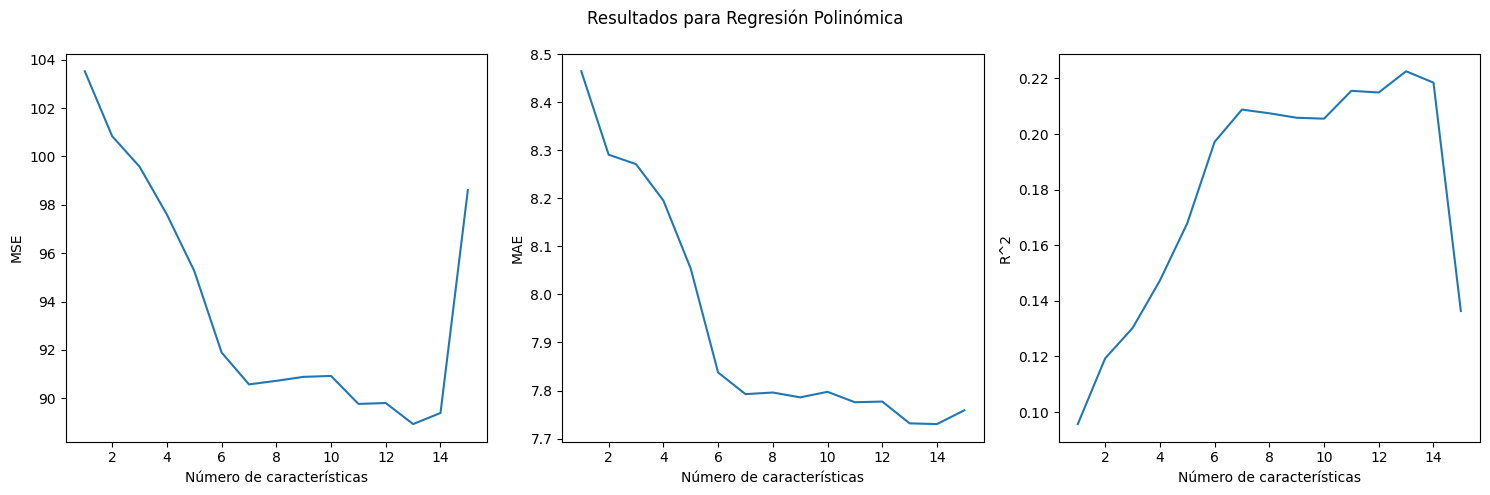


Evaluando el modelo: Regresión con Bosques Aleatorios
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 15
Características seleccionadas: ['age', 'test_time', 'HNR', 'RPDE', 'Shimmer:APQ11', 'PPE', 'Jitter(%)', 'DFA', 'Jitter:PPQ5', 'Shimmer:DDA', 'Shimmer', 'Shimmer:APQ3', 'Shimmer:APQ5', 'Jitter:DDP', 'Jitter:RAP']
MSE: 36.53024189531692
MAE: 4.64488282261717
R^2: 0.6808932959661039


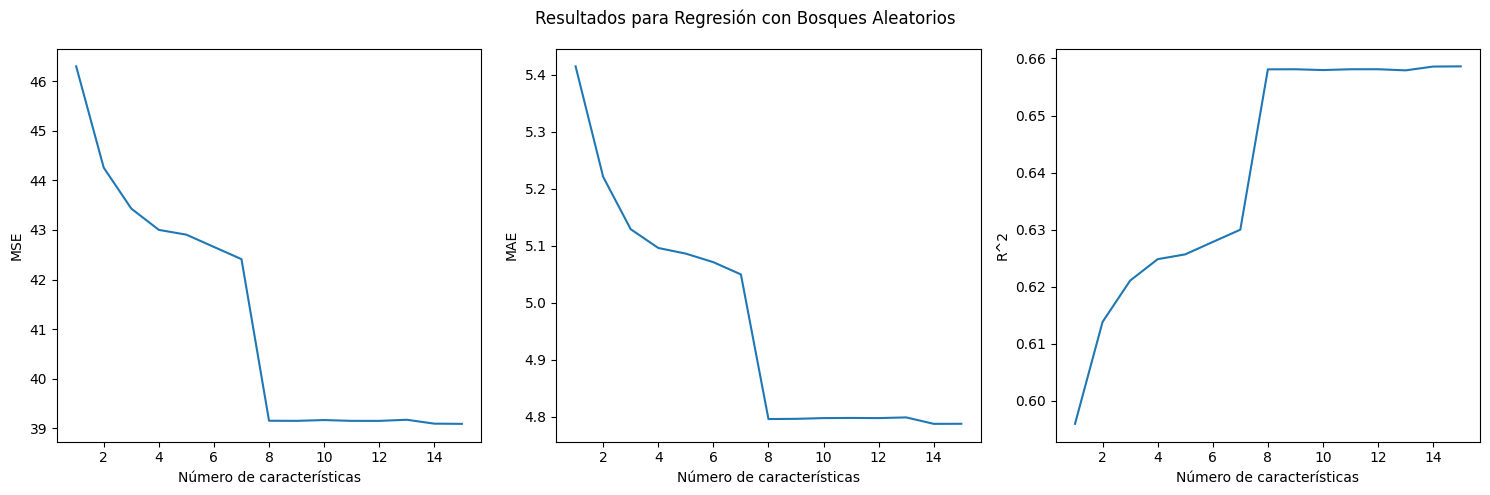


Evaluando el modelo: Regresión con Soporte Vectorial
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 1
Características seleccionadas: ['age']
MSE: 93.01405349642978
MAE: 7.668728932026509
R^2: 0.18748394480565234


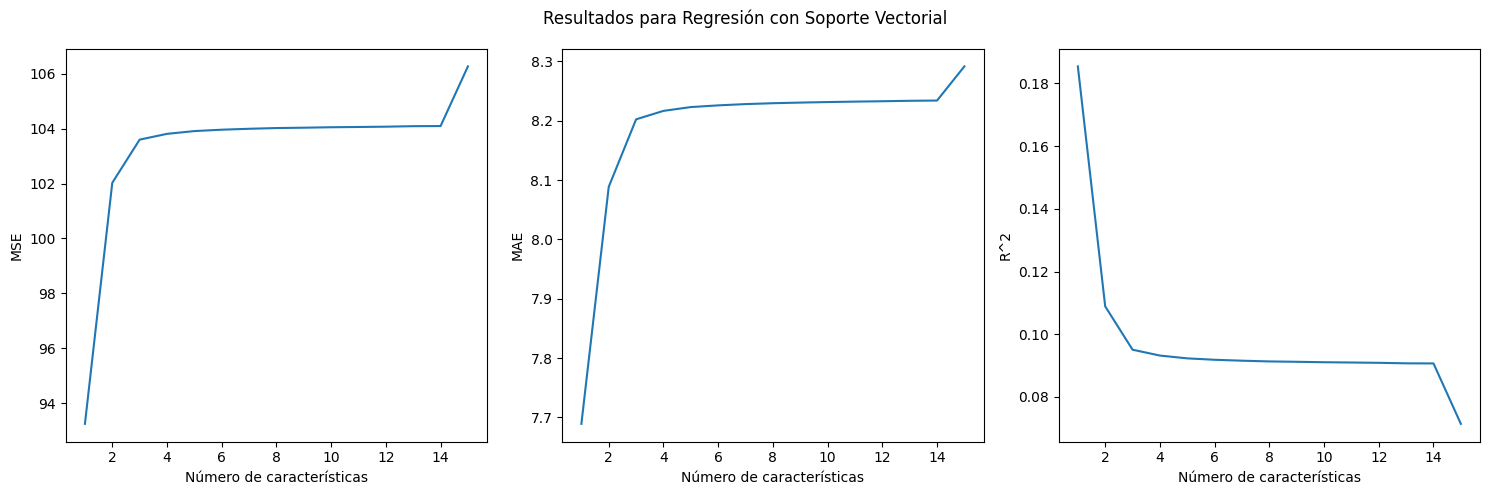


Evaluando el modelo: Árbol de Decisión
---- Número de características = 1
---- Número de características = 2
---- Número de características = 3
---- Número de características = 4
---- Número de características = 5
---- Número de características = 6
---- Número de características = 7
---- Número de características = 8
---- Número de características = 9
---- Número de características = 10
---- Número de características = 11
---- Número de características = 12
---- Número de características = 13
---- Número de características = 14
---- Número de características = 15
Número óptimo de características: 8
Características seleccionadas: ['age', 'test_time', 'HNR', 'PPE', 'Shimmer:APQ11', 'Jitter(%)', 'Jitter:PPQ5', 'DFA']
MSE: 45.27500371784451
MAE: 4.918749413129474
R^2: 0.6045042008502032


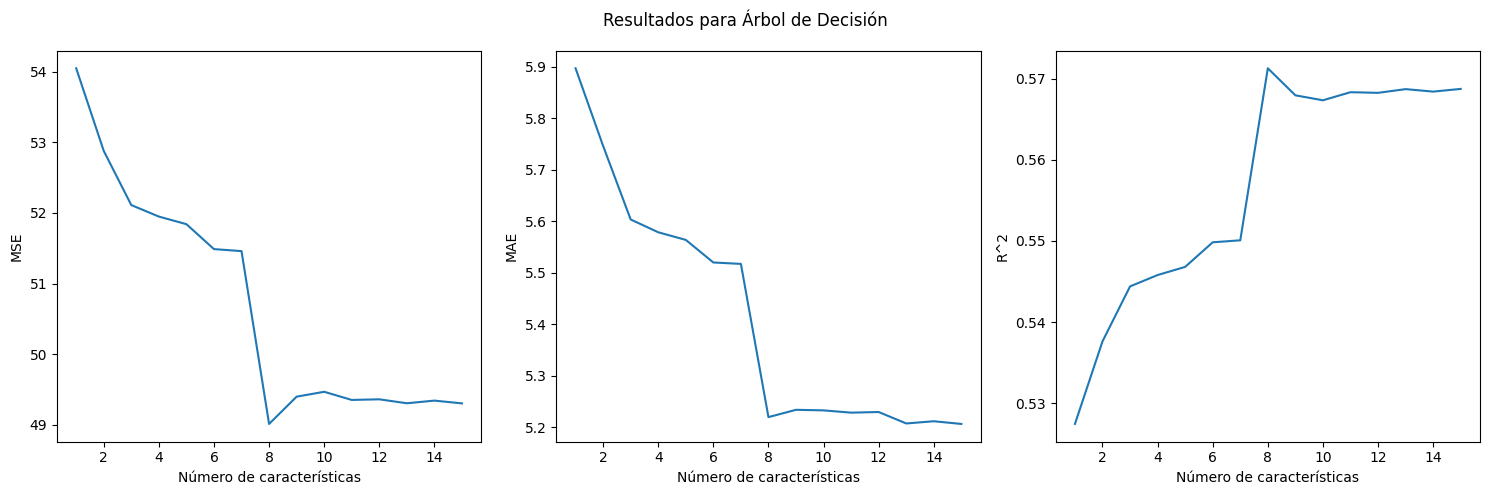

In [ ]:
#-- Paso 4: Haz el mismo proceso del paso 2, pero ahora con el método de selección de
#   características recursivo. Reporta los predictores óptimos encontrados por el método.

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

# Modelos a evaluar
models = {
    "Regresión Polinómica": Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ]),
    "Regresión con Bosques Aleatorios": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Regresión con Soporte Vectorial": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Árbol de Decisión": DecisionTreeRegressor(max_depth=5)
}

# Iterar sobre cada modelo
for model_name, model in models.items():
    print(f"\nEvaluando el modelo: {model_name}")

    # Obtener el número de características
    n_features = X.shape[1]
    n_feats = list(range(1, n_features + 1))

    mse_nfeat = []
    mae_nfeat = []
    r2_nfeat = []

    for n_feat in n_feats:
        print(f'---- Número de características = {n_feat}')

        mse_cv = []
        mae_cv = []
        r2_cv = []

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        for train_index, test_index in kf.split(X):
            X_train = X.iloc[train_index]
            y_train = y.iloc[train_index]
            X_test = X.iloc[test_index]
            y_test = y.iloc[test_index]

            if isinstance(model, Pipeline):
                # Usar SelectKBest con la misma selección para modelos en pipeline
                fselection = SelectKBest(f_regression, k=n_feat)
                X_train_selected = fselection.fit_transform(X_train, y_train)
                X_test_selected = fselection.transform(X_test)

                model.fit(X_train_selected, y_train)
                y_pred = model.predict(X_test_selected)
            else:
                # Evaluar características de manera individual para modelos no lineales
                feature_scores = {}
                for feature in X.columns:
                    X_single = X[[feature]]
                    scores = cross_val_score(model, X_single, y, cv=kf, scoring='neg_mean_squared_error')
                    feature_scores[feature] = -np.mean(scores)

                sorted_features = sorted(feature_scores.items(), key=lambda item: item[1])
                best_features = [feature for feature, score in sorted_features[:n_feat]]
                X_train_best = X_train[best_features]
                X_test_best = X_test[best_features]

                model.fit(X_train_best, y_train)
                y_pred = model.predict(X_test_best)

            mse_cv.append(mean_squared_error(y_test, y_pred))
            mae_cv.append(mean_absolute_error(y_test, y_pred))
            r2_cv.append(r2_score(y_test, y_pred))

        mse_nfeat.append(np.mean(mse_cv))
        mae_nfeat.append(np.mean(mae_cv))
        r2_nfeat.append(np.mean(r2_cv))

    # Encontrar el número óptimo de características
    opt_index = np.argmin(mse_nfeat)
    opt_features = n_feats[opt_index]
    print(f"Número óptimo de características: {opt_features}")

    # Entrenar el modelo con el número óptimo de características
    if isinstance(model, Pipeline):
        fselection = SelectKBest(f_regression, k=opt_features)
        X_transformed = fselection.fit_transform(X, y)
        model.fit(X_transformed, y)

        selected_features = X.columns[fselection.get_support()].tolist()
        print(f"Características seleccionadas: {selected_features}")
    else:
        feature_scores = {}
        for feature in X.columns:
            X_single = X[[feature]]
            scores = cross_val_score(model, X_single, y, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error')
            feature_scores[feature] = -np.mean(scores)

        sorted_features = sorted(feature_scores.items(), key=lambda item: item[1])
        best_features = [feature for feature, score in sorted_features[:opt_features]]
        print(f"Características seleccionadas: {best_features}")
        X_transformed = X[best_features]
        model.fit(X_transformed, y)

    # Mostrar resultados
    y_pred = model.predict(X_transformed)
    print(f'MSE: {mean_squared_error(y, y_pred)}')
    print(f'MAE: {mean_absolute_error(y, y_pred)}')
    print(f'R^2: {r2_score(y, y_pred)}')

    # Graficar MSE, MAE y R^2 en función del número de características
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), tight_layout=True)
    fig.suptitle(f"Resultados para {model_name}")

    axs[0].plot(n_feats, mse_nfeat)
    axs[0].set_xlabel("Número de características")
    axs[0].set_ylabel("MSE")

    axs[1].plot(n_feats, mae_nfeat)
    axs[1].set_xlabel("Número de características")
    axs[1].set_ylabel("MAE")

    axs[2].plot(n_feats, r2_nfeat)
    axs[2].set_xlabel("Número de características")
    axs[2].set_ylabel("R^2")

    plt.show()


El paso 5 es todo lo anterior ya hecho

# Viendo los resultados de este ejercicio, escriba una conclusión sobre los siguientes puntos

**Consideras que el modelo de regresión lineal es adecuado para los datos. ¿Por qué?**

lineales malos, no lineales mejores
Los modelos de regresión lineal son poco efectivos para estos datos, MSE y MAE tienen valores demasiado altos, y  R^2 tiene valores muy bajos, rondando entre 0.1 y 0.2.

**¿Qué método de selección de características consideras que funciona bien con los datos? ¿Por qué?**

Ningun metodo da resultados totalmente efectivos, tanto el recursivo como el filter regresan valores muy similares, considero que ambos funcionan lo mejor que se puede con estos datos.

**Del proceso de selección de características, ¿puedes identificar algunas que sean sobresalientes? ¿Qué información relevantes observas de dichas características?
¿Los modelos de regresión no lineal funcionaron mejor que el lineal? ¿Por qué?**

Los modelos no lineales funcionan mejor que los lineales, se adaptan mejor a los datos, la R^2 en los metodos lineales demuestra su poca compatibilidad con los datos.

**¿Se puede concluir algo interesante sobre los resultados de modelar estos datos con regresión? Argumenta tu respuesta.**

Todos los modelos lineales parecen ser inefecivos, mientras que los modelos no lineales regresan valores mas confiables, MSE y MAE se acercan a 0 en el metodo de K-vecinos.

